#MONTOWANIE DYSKU GOOGLE


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importowanie bibliotek

In [2]:
!pip install playsound

  Preparing metadata (setup.py) ... done
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7020 sha256=683e442f14ee9078d2765ed0a01e6617e8353b10277533342f2e8ef3ea858bea
  Stored in directory: /root/.cache/pip/wheels/90/89/ed/2d643f4226fc8c7c9156fc28abd8051e2d2c0de37ae51ac45c
Successfully built playsound


In [5]:
import librosa
import librosa.display
import IPython.display as ipd_display
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import signal
import random

#Zadanie 1

Załaduj plik speech1.wav. Odczytaj częstotliwość próbkowania sygnału fs i odtwórz załadowany dźwięk w
notatniku. Wyświetl wykres tego sygnału oraz zbliżonego, dowolnego fragmentu. Wyświetl spektrogram
sygnału. Następnie próbkuj sygnał w dół, dla podanych poniżej częstotliwości próbkowania. Po każdym
przepróbowaniu w dół wyświetl wykres tego sygnału, zbliżonego fragmentu (ten sam fragment, który był
wyświetlany dla oryginalnego sygnału), spektrogram oraz odtwórz w notatniku powstałe dźwięki. Co
możesz zaobserwować?
Częstotliwości próbkowania, do próbkowania w dół: fs/2, fs/4, fs/10, fs/20, fs/30, fs/50, fs/100
Zauważ, że przy każdym próbkowaniu w dół przedział czasu sygnału ulega zmianie, a więc ten sam
fragment sygnału, będzie znajdował się w innym przedziale czasu. Przy jakiej częstotliwości próbkowania
dźwięk przestaje być słyszalny?




In [9]:
from IPython.display import Audio
audio_path = '/content/drive/MyDrive/School/AEH/Cyfrowe-przetwarzanie-sygnalow/speech1.wav'
audio_speech, sampling_rate = librosa.load(audio_path, sr=None)

print(f'Częstotliwość próbkowania: {sampling_rate} Hz')

Audio(audio_path)

Częstotliwość próbkowania: 44100 Hz


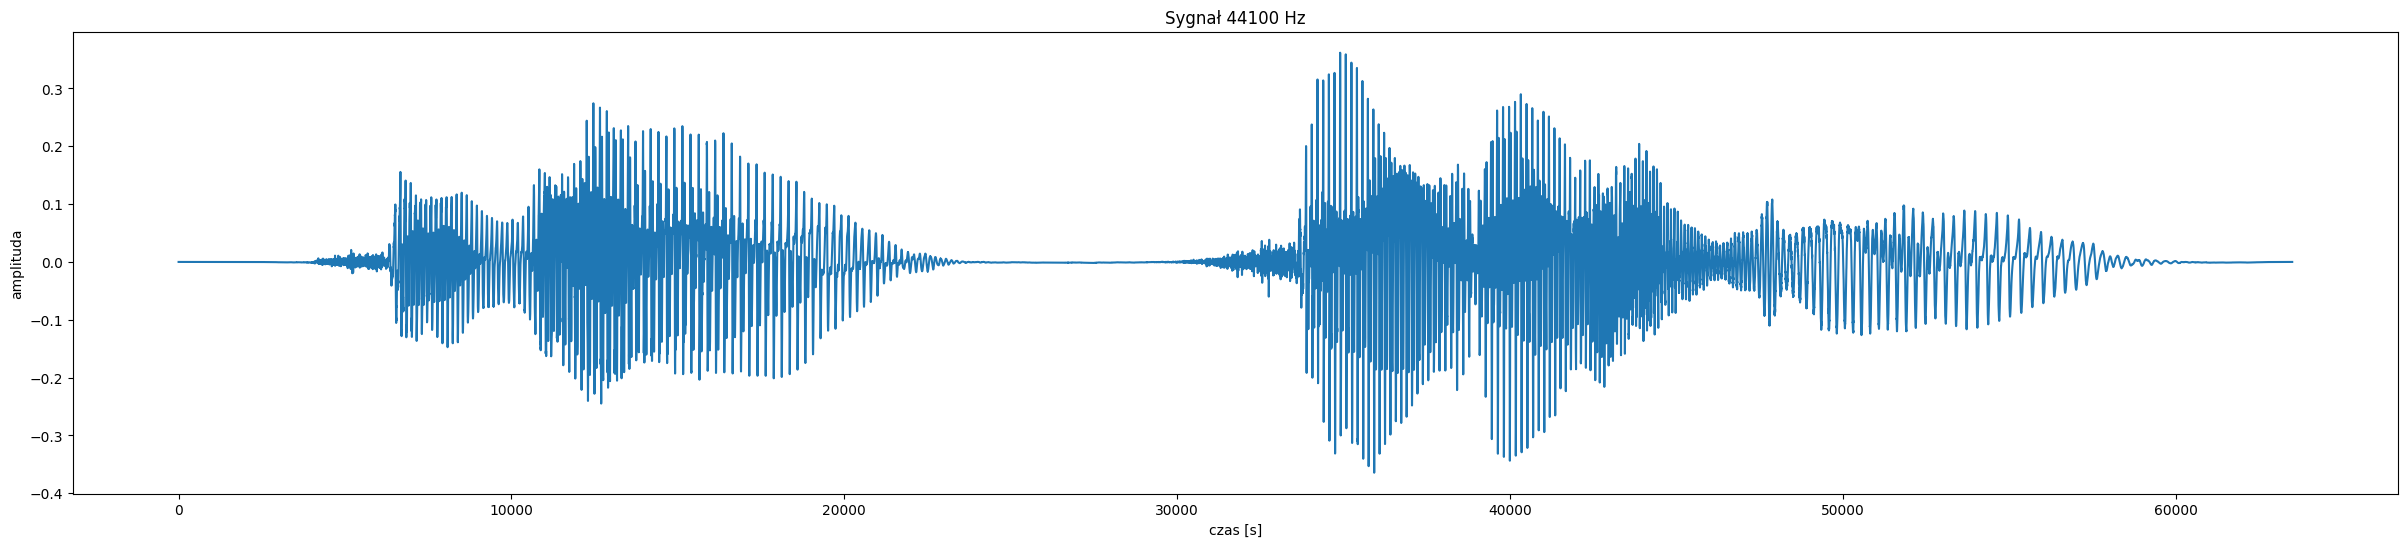

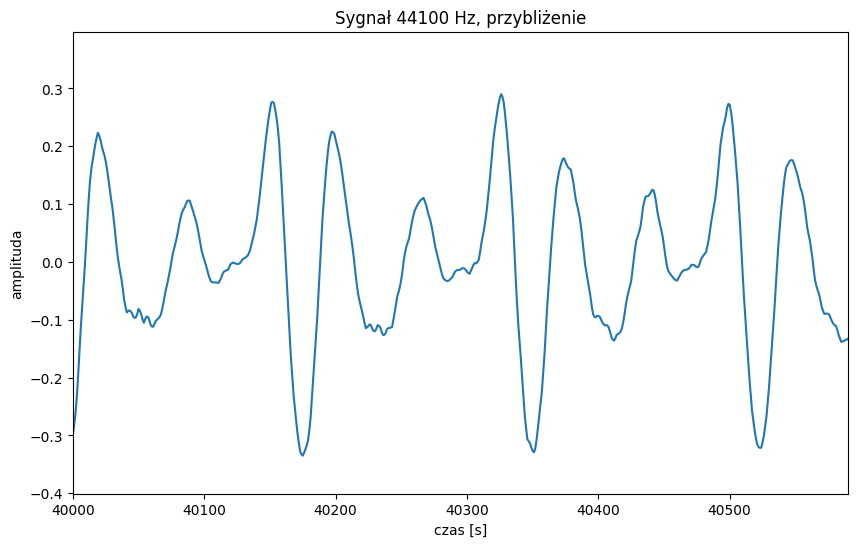

In [10]:
# Wyświetlanie sygnału
plt.figure(figsize=(30, 6))
plt.plot(audio_speech)
plt.title(f'Sygnał 44100 Hz')
plt.xlabel('czas [s]')
plt.ylabel('amplituda')

# Wyświetlanie przybliżonego fragmentu sygnału
start = 40000
stop = 40590
plt.figure(figsize=(10, 6))
plt.plot(audio_speech)
plt.xlim([start, stop])
plt.title(f'Sygnał 44100 Hz, przybliżenie')
plt.xlabel('czas [s]')
plt.ylabel('amplituda')
plt.show()

<ipython-input-11-33b879256a65>:2: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  spectrogram = librosa.amplitude_to_db(librosa.stft(audio_speech), ref=np.max)


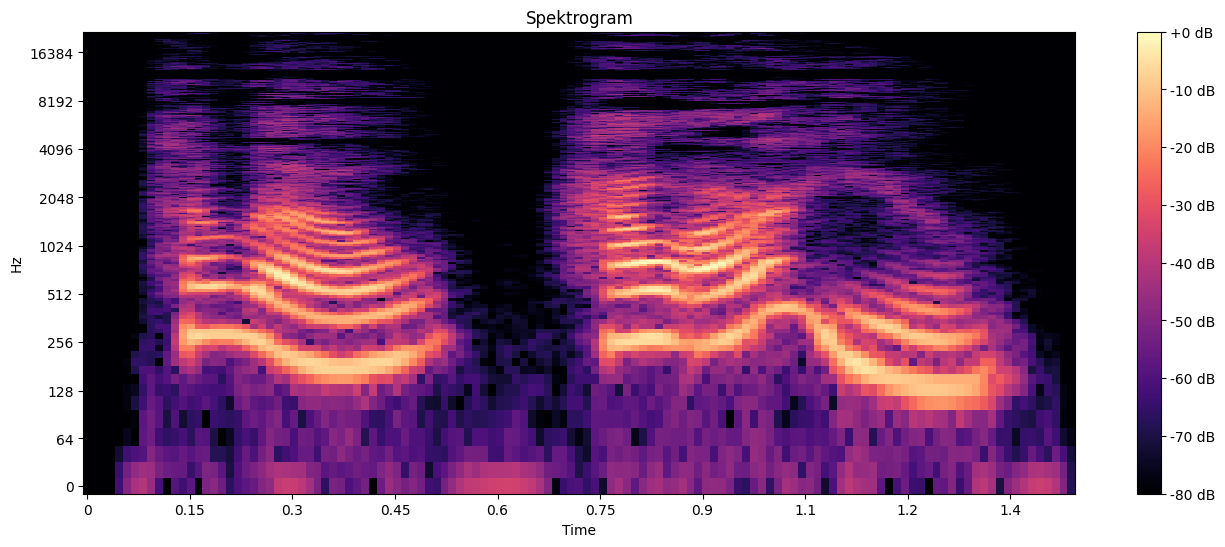

In [11]:
# Tworzenie i wyświetlanie spektrogramu
spectrogram = librosa.amplitude_to_db(librosa.stft(audio_speech), ref=np.max)
plt.figure(figsize=(16, 6))
librosa.display.specshow(spectrogram, sr=sampling_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spektrogram')
plt.show()

#Próbkowanie w dół -> fs/2

In [12]:
resample_factor = 2
new_sampling_rate = int(sampling_rate / resample_factor)
audio_speech_2 = audio_speech[::resample_factor]
print(f"Nowa częstotliwość próbkowania: {new_sampling_rate} Hz")
Audio(audio_speech_2, rate=new_sampling_rate)

Nowa częstotliwość próbkowania: 22050 Hz


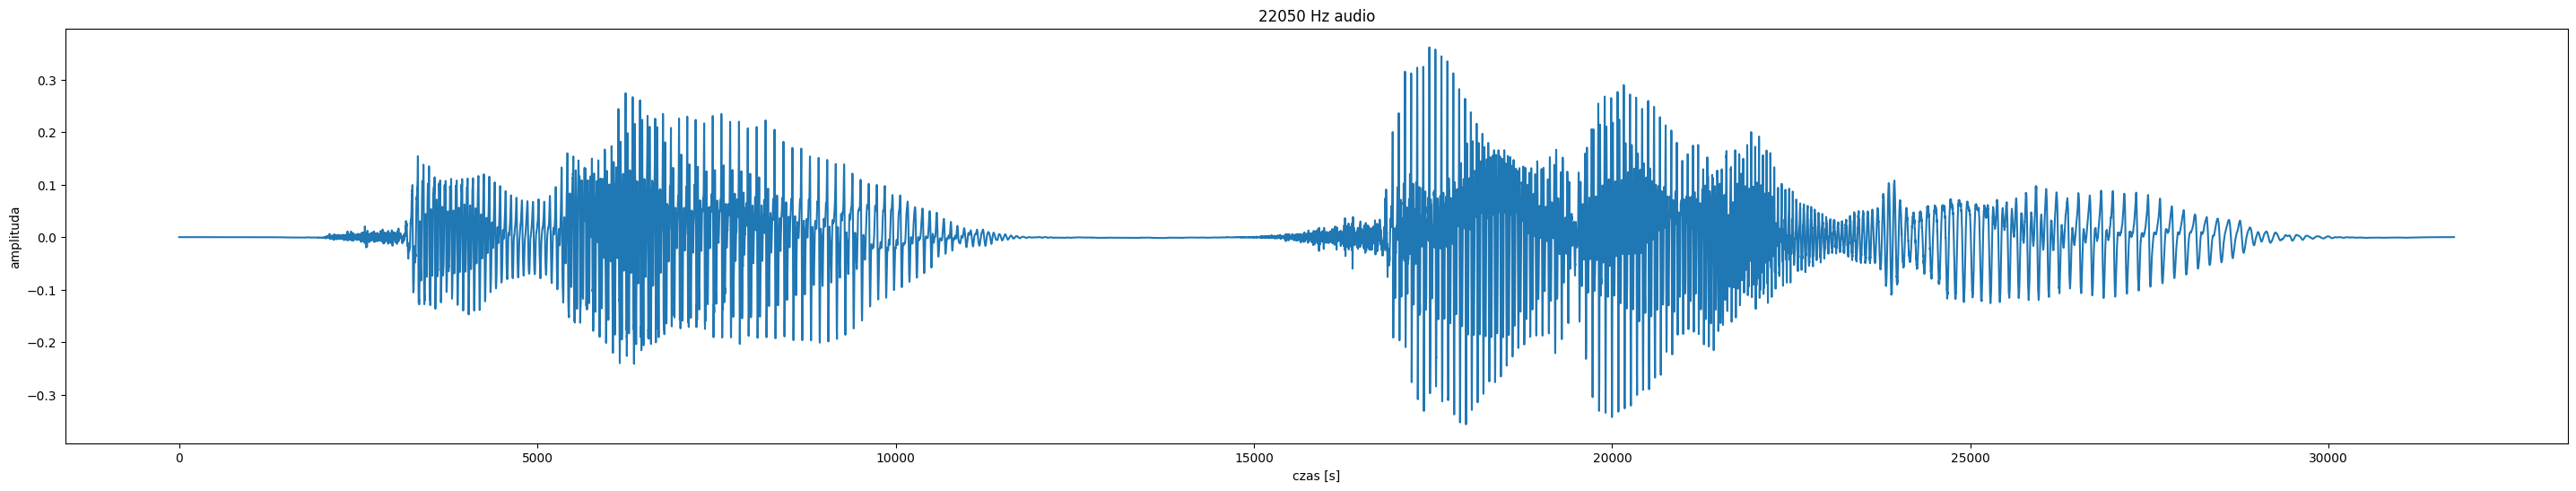

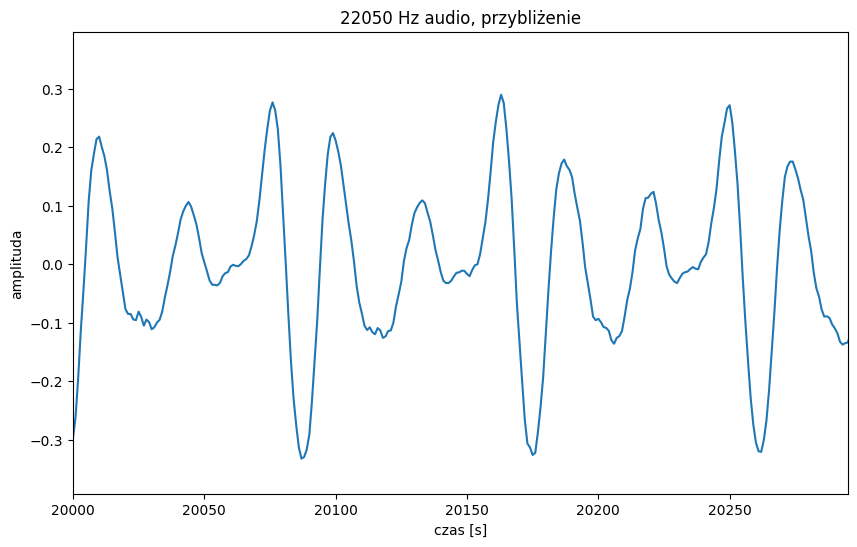

In [13]:
# Wyświetlanie sygnału
plt.figure(figsize=(36, 6))
plt.plot(audio_speech_2)
plt.title(f'{new_sampling_rate} Hz audio')
plt.xlabel('czas [s]')
plt.ylabel('amplituda')

# Wyświetlanie przybliżonego fragmentu sygnału
new_start = start / resample_factor
new_stop = stop / resample_factor
plt.figure(figsize=(10, 6))
plt.plot(audio_speech_2)
plt.xlim([new_start, new_stop])
plt.title(f'{new_sampling_rate} Hz audio, przybliżenie')
plt.xlabel('czas [s]')
plt.ylabel('amplituda')
plt.show()

<ipython-input-15-b2b7b5e07a79>:2: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  spectrogram = librosa.amplitude_to_db(librosa.stft(audio_speech_2), ref=np.max)


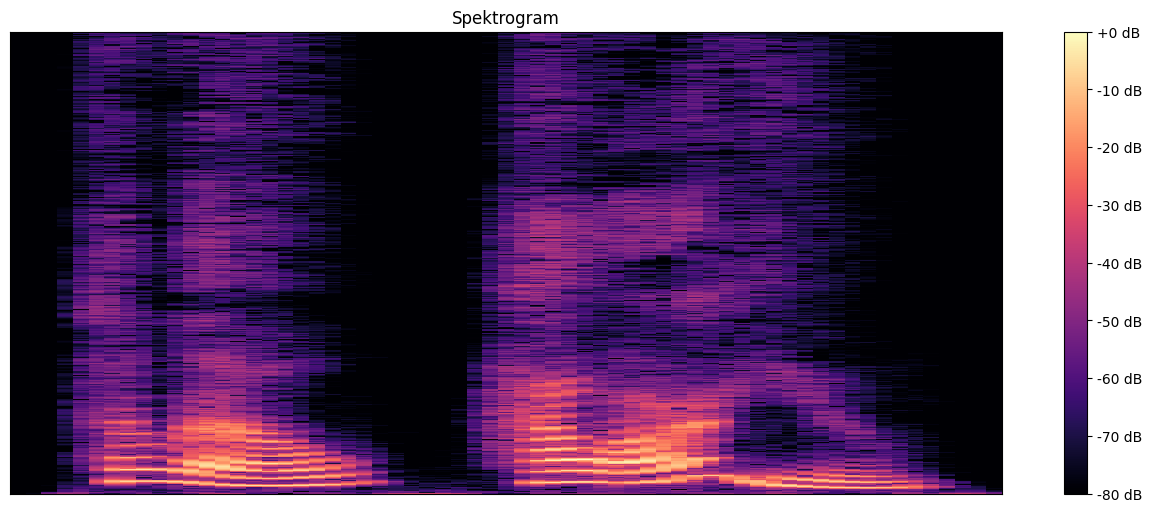

In [15]:
# Tworzenie i wyświetlanie spektrogramu
spectrogram = librosa.amplitude_to_db(librosa.stft(audio_speech_2), ref=np.max)
plt.figure(figsize=(16, 6))
librosa.display.specshow(spectrogram, sr=new_sampling_rate)
plt.colorbar(format='%+2.0f dB')
plt.title('Spektrogram')
plt.show()

#Definiowanie funckji do próbkowania w dól, odtwarzania dzwieku. wyswietlania wykresów i spektrogramów

In [24]:
def downsampling(audio_speech, sampling_rate, resample_factor):
    new_sampling_rate = int(sampling_rate / resample_factor)
    audio_speech_new = audio_speech[::resample_factor]
    print(f'Nowa częstotliwość próbkowania: {new_sampling_rate} Hz')
    return audio_speech_new, new_sampling_rate


In [17]:
def display_signal(audio_speech_new, new_sampling_rate):
    plt.figure(figsize=(30, 6))
    plt.plot(audio_speech_new)
    plt.title(f'{new_sampling_rate} Hz audio')
    plt.xlabel('czas [s]')
    plt.ylabel('amplituda')

def display_signal_fragment(audio_speech_new, new_sampling_rate, start, stop, resample_factor):
    new_start = start // resample_factor
    new_stop = stop // resample_factor
    plt.figure(figsize=(10, 6))
    plt.plot(audio_speech_new)
    plt.xlim([new_start, new_stop])
    plt.title(f'{new_sampling_rate} Hz audio z zoomem')
    plt.xlabel('czas [s]')
    plt.ylabel('amplituda')
    plt.show()

def display_spectrogram(audio_speech_new, new_sampling_rate):
    spectrogram = librosa.amplitude_to_db(librosa.stft(audio_speech_new), ref=np.max)
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(spectrogram, sr=new_sampling_rate, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spektrogram')
    plt.show()

#Próbkowanie w dół -> fs/4

In [25]:
resample_factor = 4
audio_speech_new, new_sampling_rate = downsampling(audio_speech, sampling_rate, resample_factor)

Nowa częstotliwość próbkowania: 11025 Hz


In [26]:
Audio(audio_speech_new, rate=new_sampling_rate)


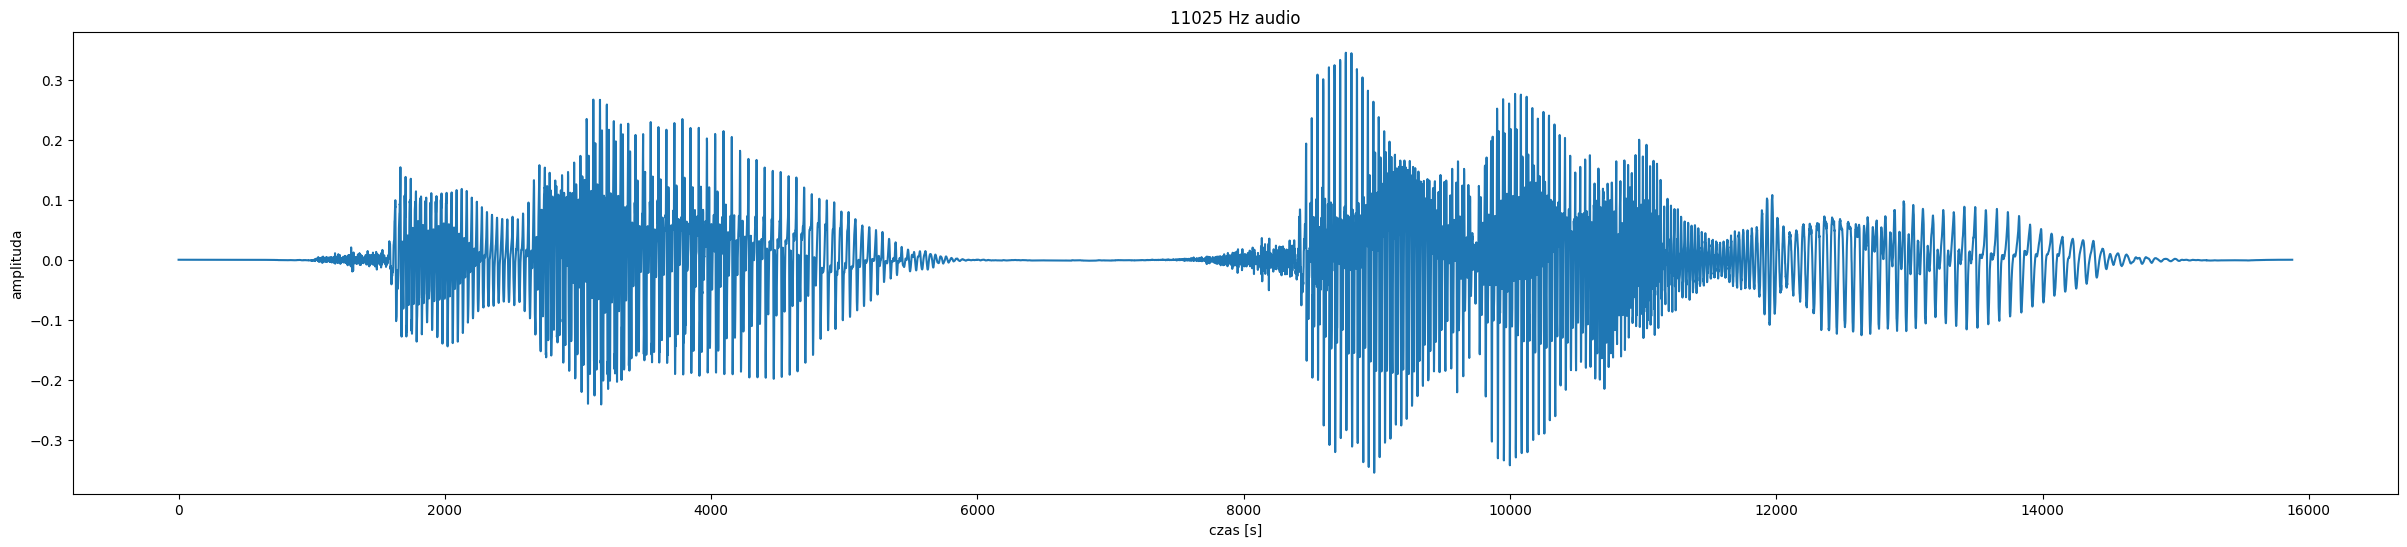

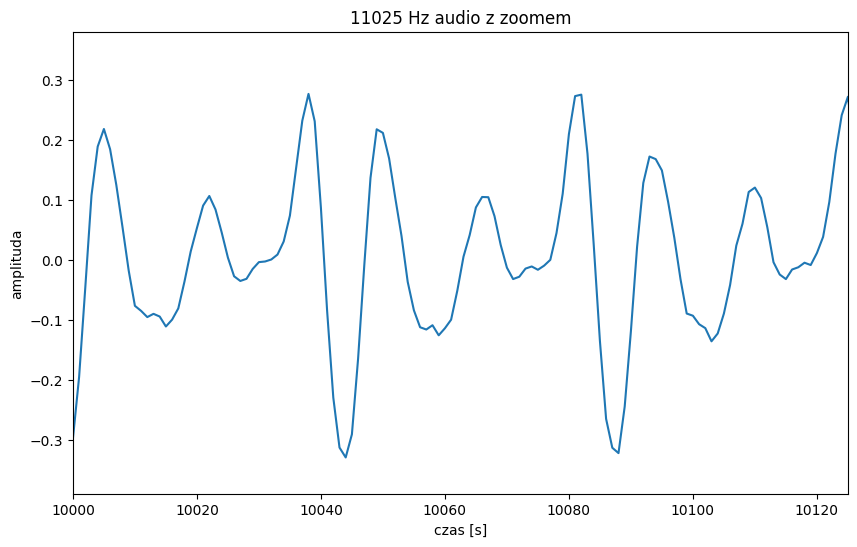

<ipython-input-17-400202147f22>:20: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  spectrogram = librosa.amplitude_to_db(librosa.stft(audio_speech_new), ref=np.max)


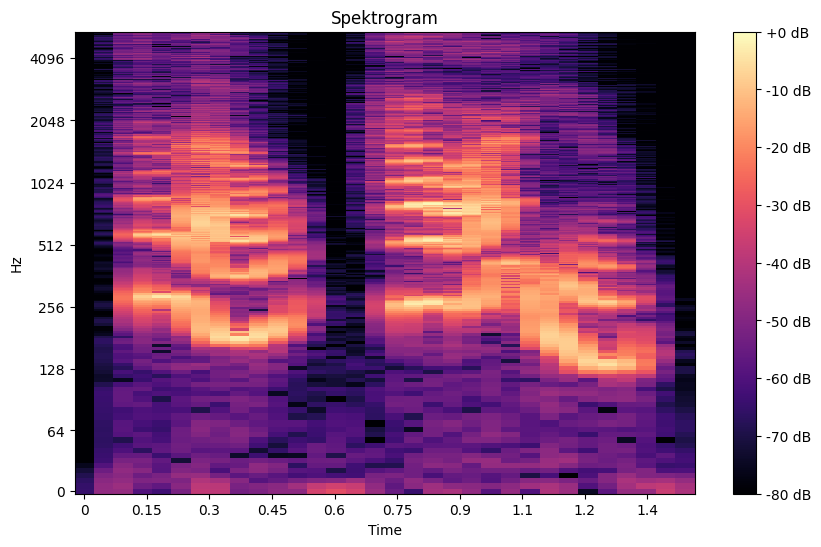

In [28]:
start = 40000
stop = 40500

display_signal(audio_speech_new, new_sampling_rate)
display_signal_fragment(audio_speech_new, new_sampling_rate, start, stop, resample_factor)
display_spectrogram(audio_speech_new, new_sampling_rate)

#Próbkowanie w dół -> fs/10

In [30]:
resample_factor = 10
audio_speech_new, new_sampling_rate = downsampling(audio_speech, sampling_rate, resample_factor)

Nowa częstotliwość próbkowania: 4410 Hz


In [31]:
Audio(audio_speech_new, rate=new_sampling_rate)

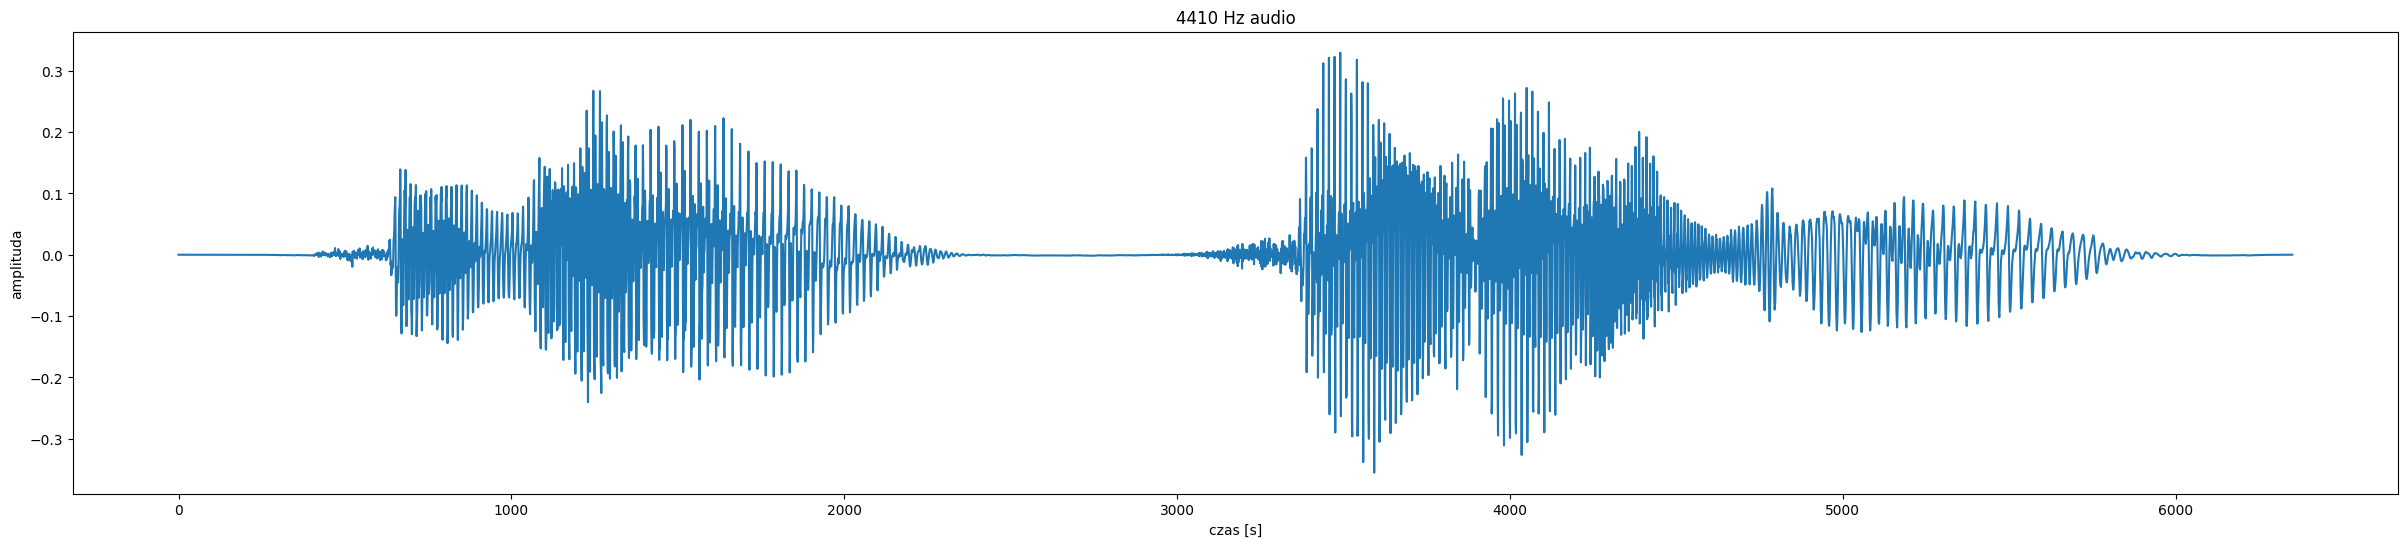

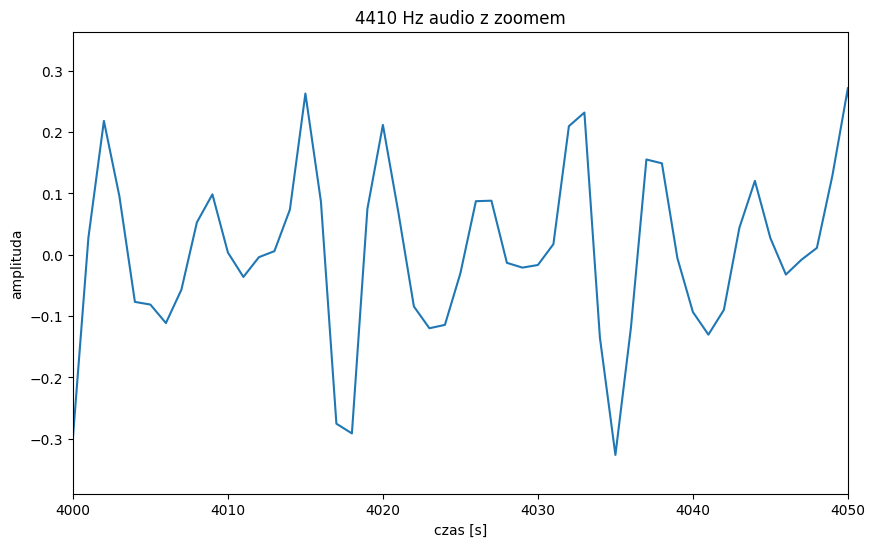

<ipython-input-17-400202147f22>:20: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  spectrogram = librosa.amplitude_to_db(librosa.stft(audio_speech_new), ref=np.max)


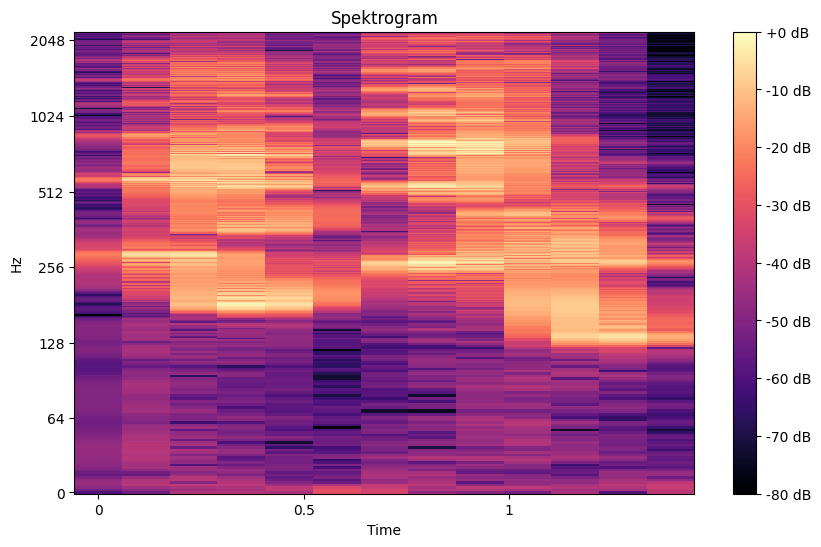

In [32]:
start = 40000
stop = 40500
display_signal(audio_speech_new, new_sampling_rate)
display_signal_fragment(audio_speech_new, new_sampling_rate, start, stop, resample_factor)
display_spectrogram(audio_speech_new, new_sampling_rate)

#Próbkowanie w dół -> fs/20

In [34]:
resample_factor = 20
audio_speech_new, new_sampling_rate = downsampling(audio_speech, sampling_rate, resample_factor)

Nowa częstotliwość próbkowania: 2205 Hz


In [ ]:
Audio(audio_speech_new, rate=new_sampling_rate)

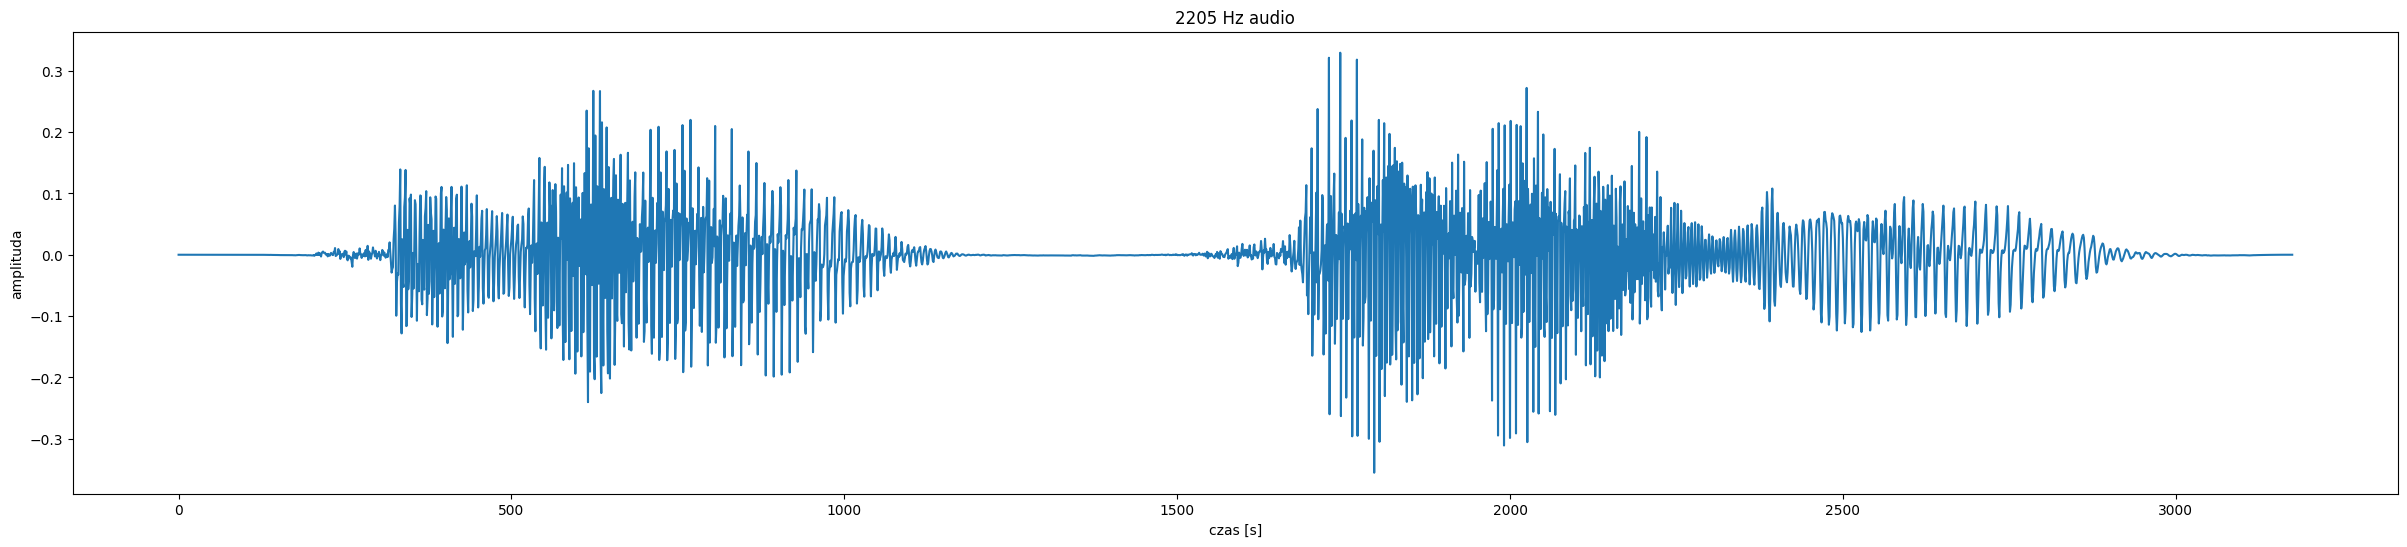

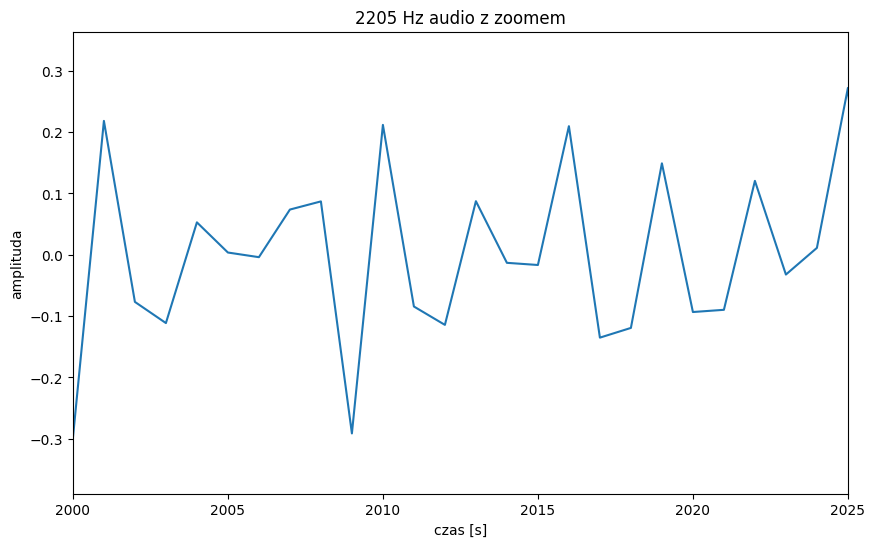

<ipython-input-17-400202147f22>:20: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  spectrogram = librosa.amplitude_to_db(librosa.stft(audio_speech_new), ref=np.max)


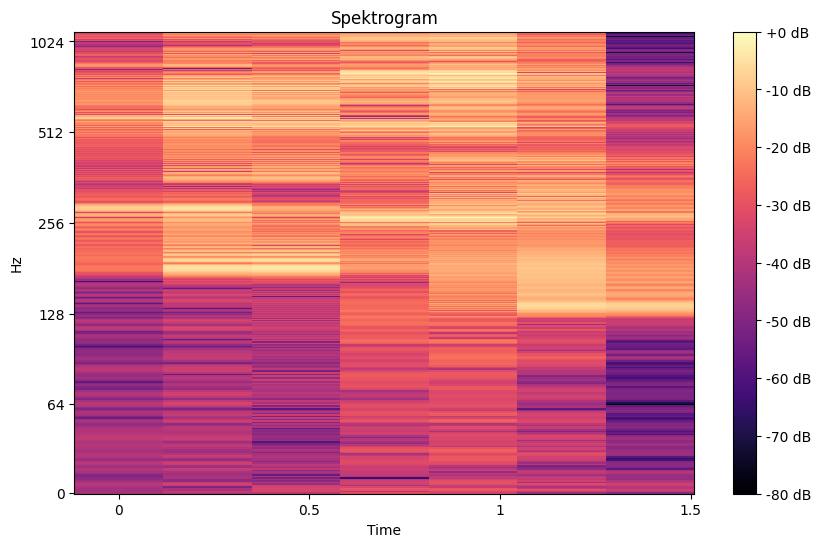

In [35]:
start = 40000
stop = 40500
display_signal(audio_speech_new, new_sampling_rate)
display_signal_fragment(audio_speech_new, new_sampling_rate, start, stop, resample_factor)
display_spectrogram(audio_speech_new, new_sampling_rate)

# Próbkowanie w dół → fs/30

In [36]:
resample_factor = 30
audio_speech_new, new_sampling_rate = downsampling(audio_speech, sampling_rate, resample_factor)

Nowa częstotliwość próbkowania: 1470 Hz


In [37]:
Audio(audio_speech_new, rate=new_sampling_rate)

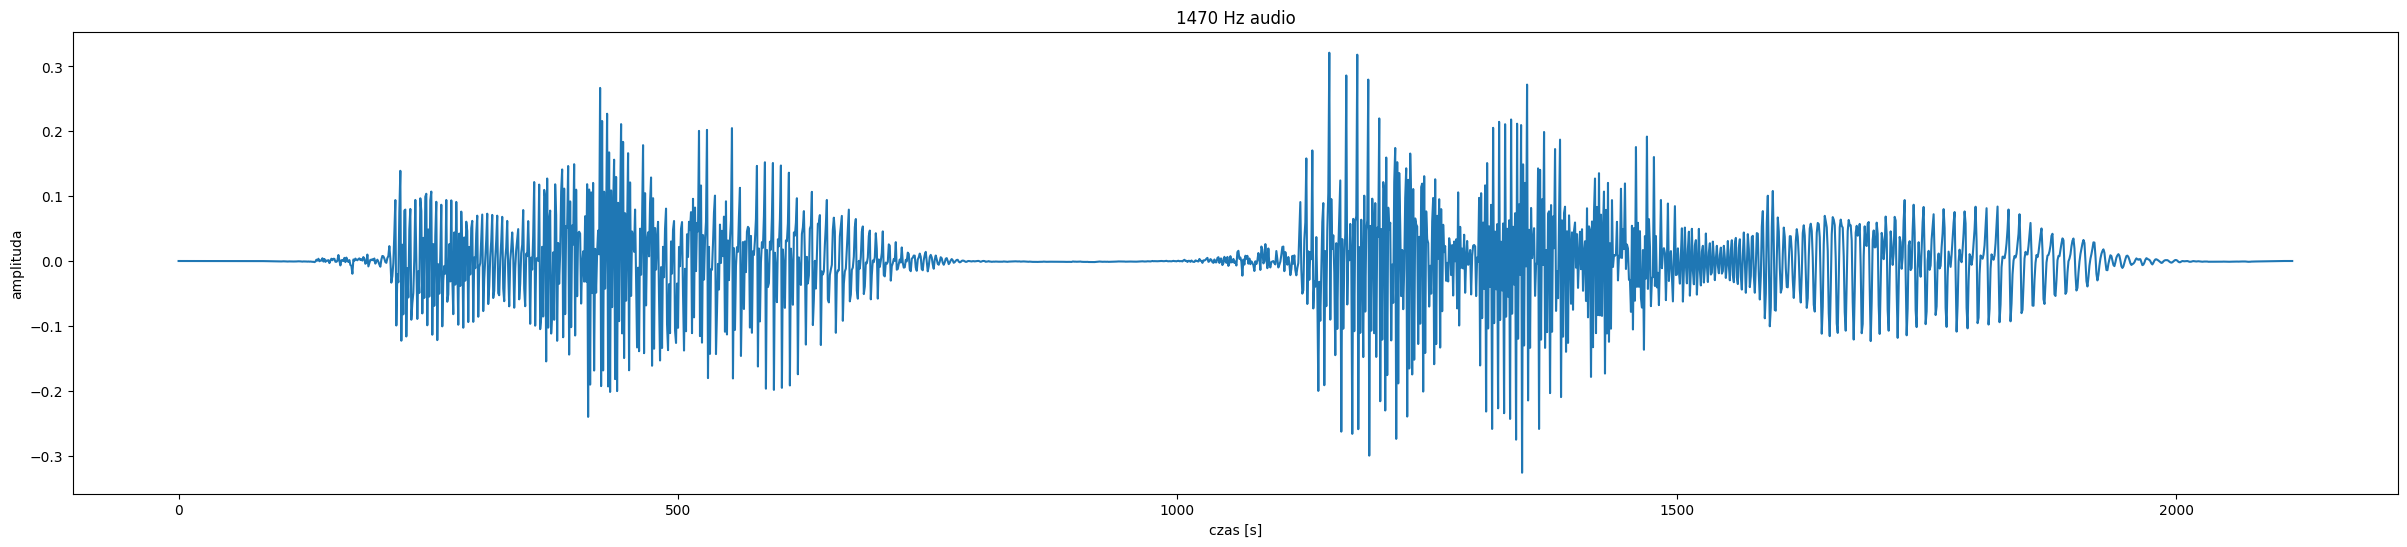

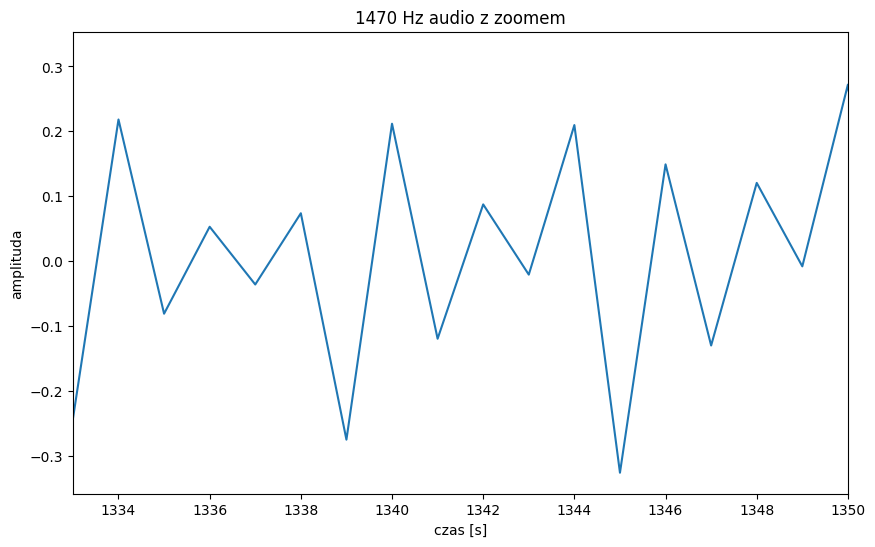

<ipython-input-17-400202147f22>:20: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  spectrogram = librosa.amplitude_to_db(librosa.stft(audio_speech_new), ref=np.max)


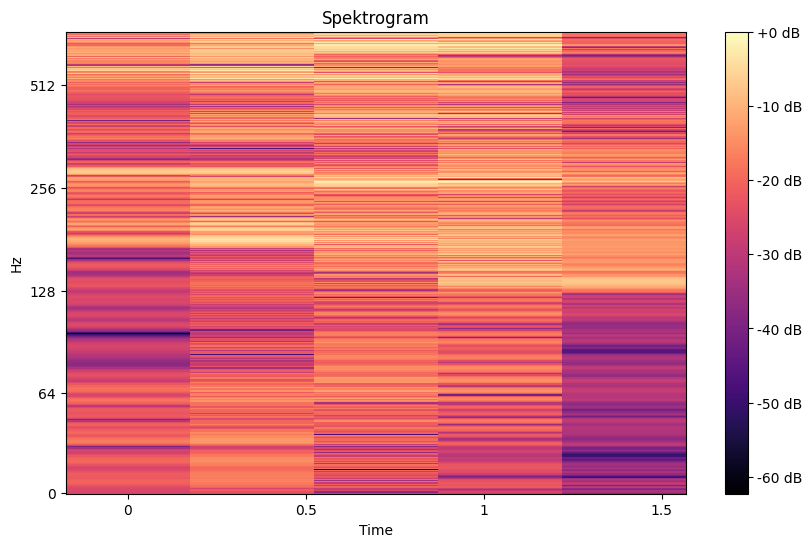

In [38]:
start = 40000
stop = 40500
display_signal(audio_speech_new, new_sampling_rate)
display_signal_fragment(audio_speech_new, new_sampling_rate, start, stop, resample_factor)
display_spectrogram(audio_speech_new, new_sampling_rate)


# Próbkowanie w dół → fs/50

In [39]:
resample_factor = 50
audio_speech_new, new_sampling_rate = downsampling(audio_speech, sampling_rate, resample_factor)

Nowa częstotliwość próbkowania: 882 Hz


In [ ]:
Audio(audio_speech_new, rate=new_sampling_rate)

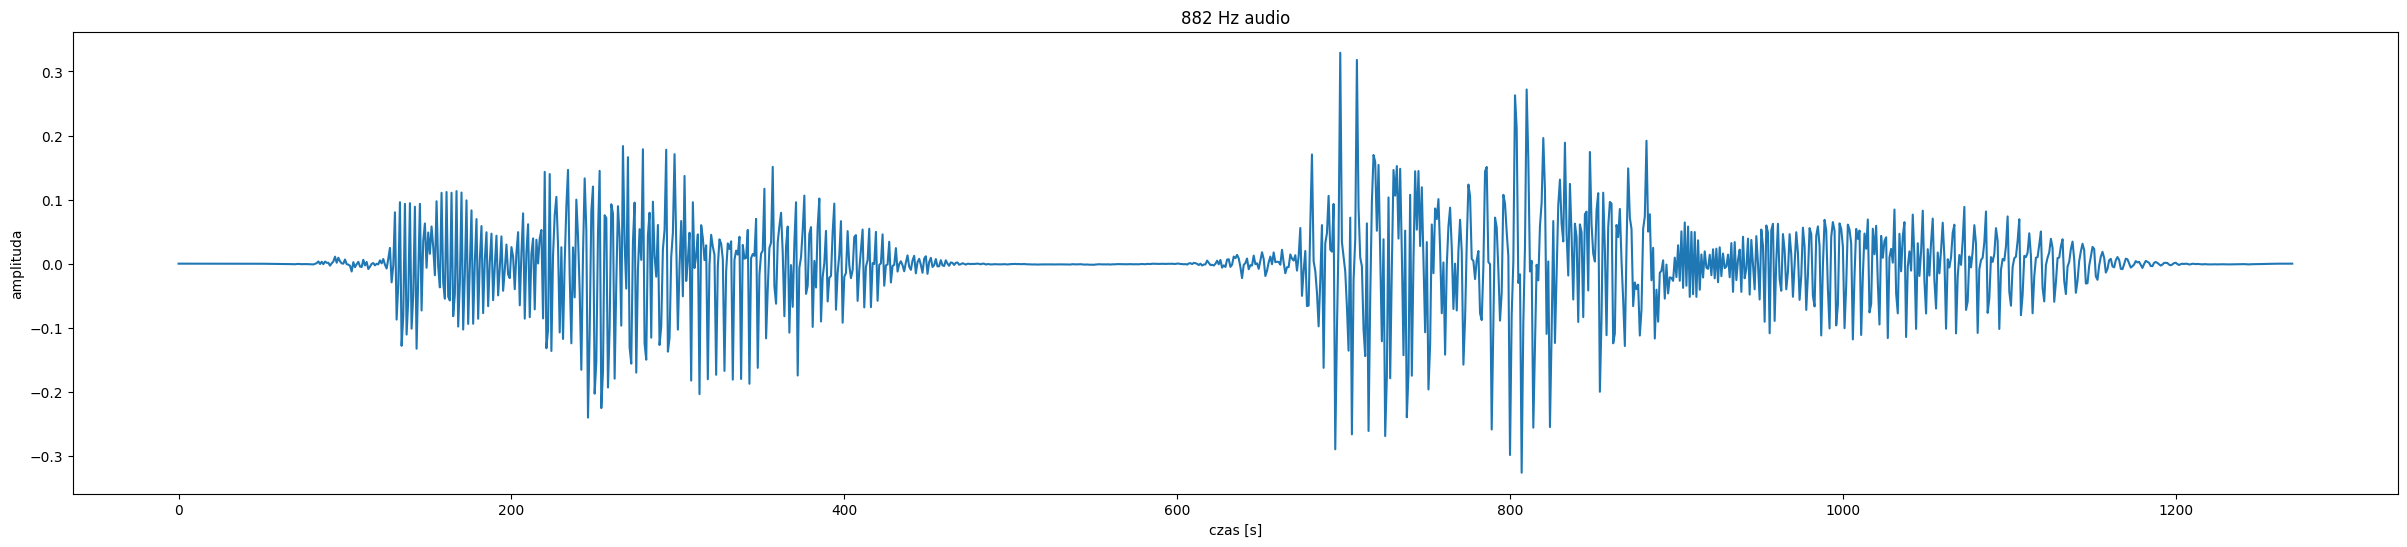

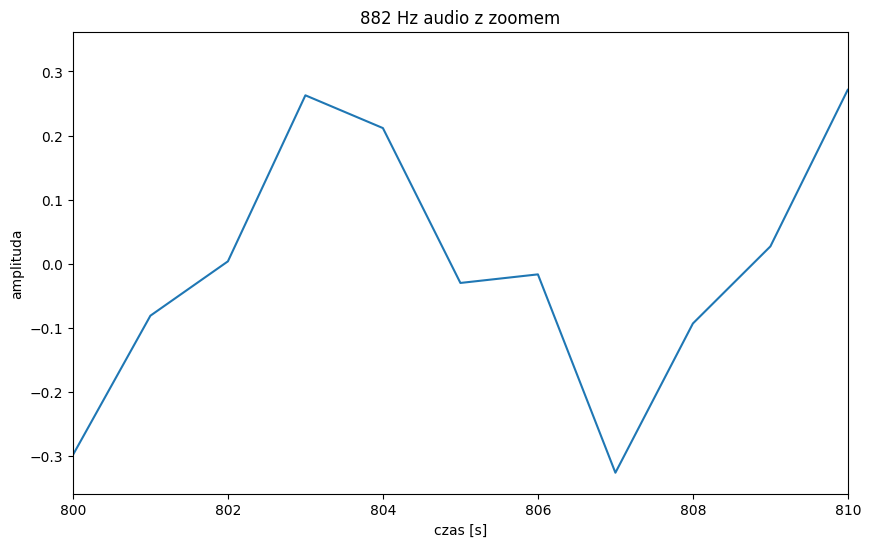

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1271
  warnings.warn(
<ipython-input-17-400202147f22>:20: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  spectrogram = librosa.amplitude_to_db(librosa.stft(audio_speech_new), ref=np.max)


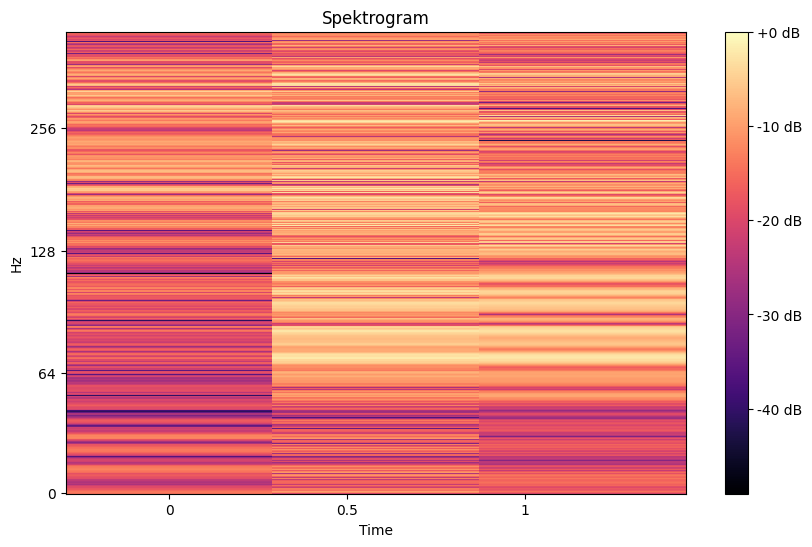

In [41]:
start = 40000
stop = 40500
display_signal(audio_speech_new, new_sampling_rate)
display_signal_fragment(audio_speech_new, new_sampling_rate, start, stop, resample_factor)
display_spectrogram(audio_speech_new, new_sampling_rate)

# Próbkowanie w dół → fs/100

In [42]:
resample_factor = 100
audio_speech_new, new_sampling_rate = downsampling(audio_speech, sampling_rate, resample_factor)

Nowa częstotliwość próbkowania: 441 Hz


In [43]:
Audio(audio_speech_new, rate=new_sampling_rate)

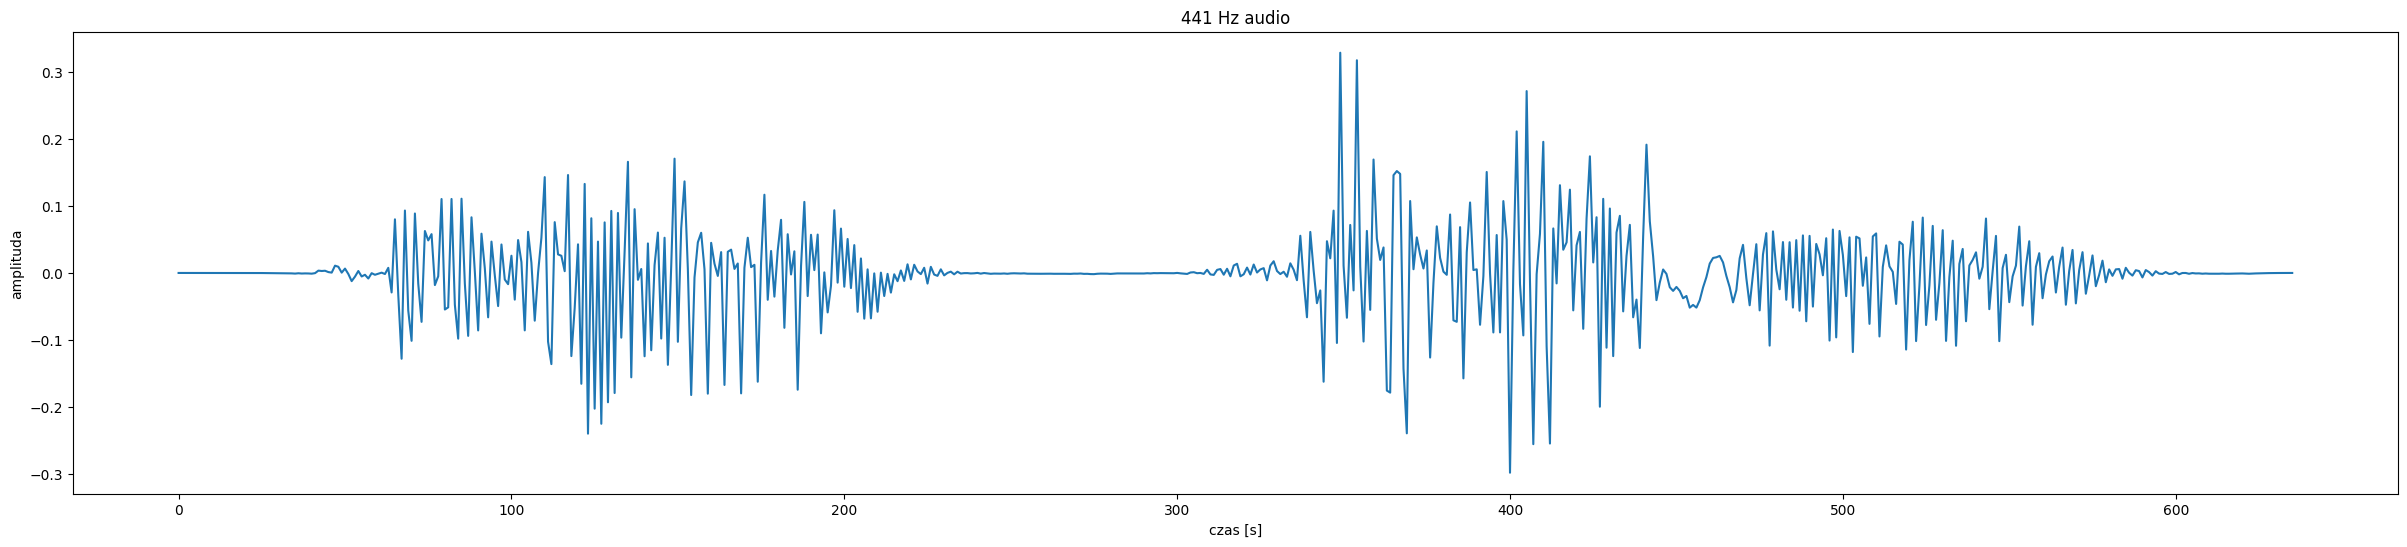

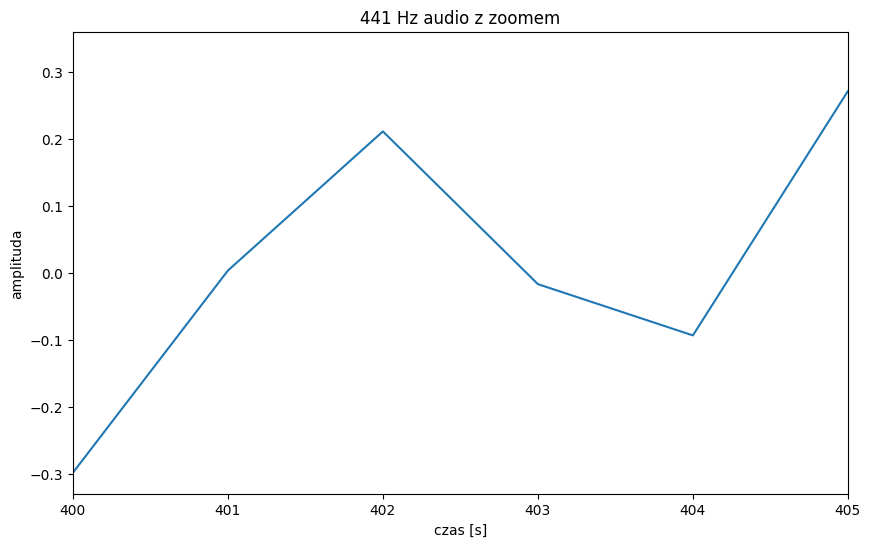

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=636
  warnings.warn(
<ipython-input-17-400202147f22>:20: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  spectrogram = librosa.amplitude_to_db(librosa.stft(audio_speech_new), ref=np.max)


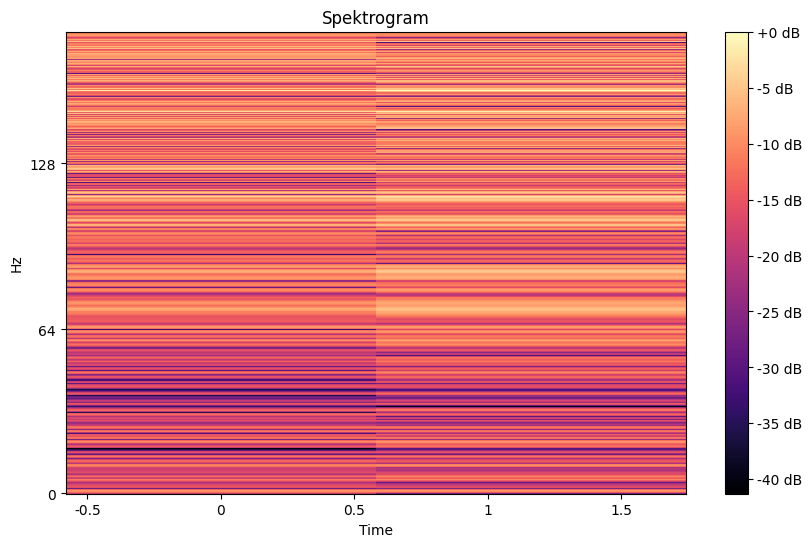

In [44]:
start = 40000
stop = 40500
display_signal(audio_speech_new, new_sampling_rate)
display_signal_fragment(audio_speech_new, new_sampling_rate, start, stop, resample_factor)
display_spectrogram(audio_speech_new, new_sampling_rate)


#Kwantyzacja:
Kwantyzacja to proces podziału ciągłego sygnału na dyskretne poziomy lub poziomy kwantyzacji. Oto kroki
kwantyzacji równomiernej sygnału krok po kroku:

Krok 1: Przygotowanie sygnału:
Przygotuj sygnał, który ma zostać zkwantyzowany. To może być sygnał audio, obraz, lub inny rodzaj
sygnału.

Krok 2: Określenie liczby poziomów kwantyzacji:
Zdecyduj, ile poziomów (wartości) chcesz użyć do reprezentacji sygnału. Jest to liczba dyskretnych
poziomów, na które zostanie podzielony zakres wartości sygnału.

Krok 3: Określenie zakresu kwantyzacji:
Określ zakres wartości sygnału, który chcesz zkwantyzować. Dla sygnału audio, zakres może wynosić od -1
do 1, a dla obrazów od 0 do 255 (dla obrazów odcieni szarości).

Krok 4: Obliczenie kroku kwantyzacji:
Oblicz krok kwantyzacji, który jest różnicą między maksymalną a minimalną wartością w zakresie podziału
przez liczbę poziomów kwantyzacji. Dla sygnałów audio, krok może wynosić 2 / (liczba poziomów - 1).

Krok 5: Kwantyzacja:
Przejdź przez każdy próbkę lub piksel sygnału i przypisz ją do najbliższego poziomu kwantyzacji. Możesz to
zrobić za pomocą funkcji round lub zaokrąglania w dół.

Krok 6: Odtworzenie sygnału zkwantyzowanego:
Po dokonaniu kwantyzacji, odtwórz sygnał zkwantyzowany poprzez przypisanie każdemu próbkowi lub
pikselowi jego wartości odpowiadającej poziomowi kwantyzacji.

Krok 7: Ocena błędu kwantyzacji (opcjonalnie):
Jeśli jest to konieczne, możesz ocenić błąd kwantyzacji, korzystając z metryk takich jak błąd
średniokwadratowy (MSE) lub stosunek sygnału do szumu (SNR).

Krok 8: Wykorzystanie sygnału zkwantyzowanego:
Wykorzystaj zkwantyzowany sygnał do dalszego przetwarzania lub zapisu, w zależności od celu
kwantyzacji.

To są ogólne kroki procesu kwantyzacji sygnału. Warto zaznaczyć, że dobór liczby poziomów kwantyzacji,
zakresu i kroku zależy od konkretnego przypadku i zastosowania sygnału. Dodatkowo, niektóre techniki
kwantyzacji, takie jak kwantyzacja nieliniowa, mogą wymagać bardziej zaawansowanych kroków

#Zadanie 2 Kwantyzacja równomierna

Zasymuluj sygnał o częstotliwości f = 10 Hz, przy częstotliwości próbkowania fs = 1kHz. Kwantyzacja
równomierna to rodzaj kwantyzacji, w której zakres wartości sygnału jest podzielony na równo
rozmieszczone poziomy kwantyzacji. Przeprowadź proces kwantyzacji równomiernej na zasymulowanym
sygnale przy 5 poziomach kwantyzacji i zakresie kwantyzacji równej 1. Wyświetl na jednym wykresie
sygnał oryginalny i skwantyzowany

Błąd kwantyzacji (MSE): 0.0047571205864184295


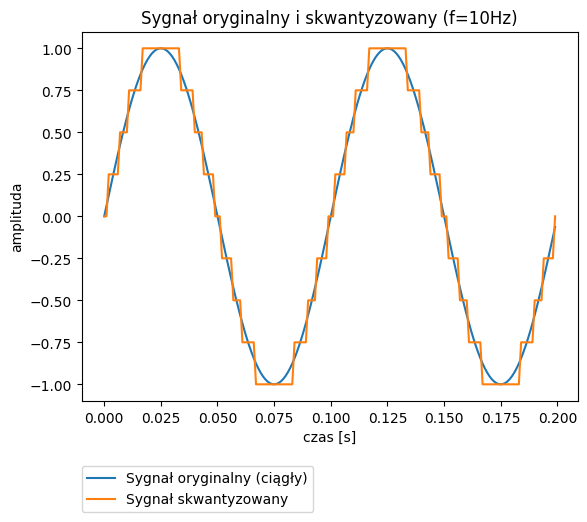

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Krok 1: Przygotowanie sygnału
fs = 1000
t = np.arange(0, 0.2, 1/fs)
f = 10
amplitude = 1
sig = np.sin(2 * np.pi * f * t) * amplitude
plt.plot(t, sig, label='Sygnał oryginalny (ciągły)')

# Krok 2: Określenie liczby poziomów kwantyzacji
quantization_levels = 5  # Przykładowa liczba poziomów kwantyzacji

# Krok 3: Określenie zakresu kwantyzacji
quantization_range = 1.0  # Przykładowy zakres wartości od -1 do 1

# Krok 4: Obliczenie kroku kwantyzacji
quantization_step = quantization_range / (quantization_levels - 1)

# Krok 5: Kwantyzacja
quantized_signal = np.round(sig / quantization_step) * quantization_step

# Krok 6: Odtworzenie sygnału zkwantyzowanego
reconstructed_signal = quantized_signal

# Krok 7: Ocena błędu kwantyzacji (opcjonalnie)
mse = np.mean((sig - reconstructed_signal) ** 2)
print("Błąd kwantyzacji (MSE):", mse)

# Krok 8: Wykorzystanie sygnału zkwantyzowanego (w tym przypadku wypisujemy go)
plt.plot(t, reconstructed_signal, label='Sygnał skwantyzowany')
plt.title('Sygnał oryginalny i skwantyzowany (f=10Hz)')
plt.xlabel('czas [s]')
plt.ylabel('amplituda')
plt.legend(loc=(0, -0.3))
plt.show()


#Zadanie 3 Kwantyzacja nieliniowa
Kwantyzacja nieliniowa to technika kwantyzacji, która nie dzieli zakresu wartości sygnału równomiernie,
ale dostosowuje poziomy kwantyzacji w sposób nieliniowy, co może prowadzić do lepszej jakości sygnału
w przypadku, gdy sygnał jest bardziej skoncentrowany w określonych obszarach. Zasymuluj sygnał o
częstotliwości f = 10 Hz, przy częstotliwości próbkowania fs = 1kHz. Następnie przeprowadź proces
kwantyzacji nieliniowej przy 5 poziomach kwantyzacji i zakresie kwantyzacji równej 1. Wyświetl na jednym
wykresie sygnał oryginalny i skwantyzowany

Błąd kwantyzacji (MSE): 0.02588598460581014


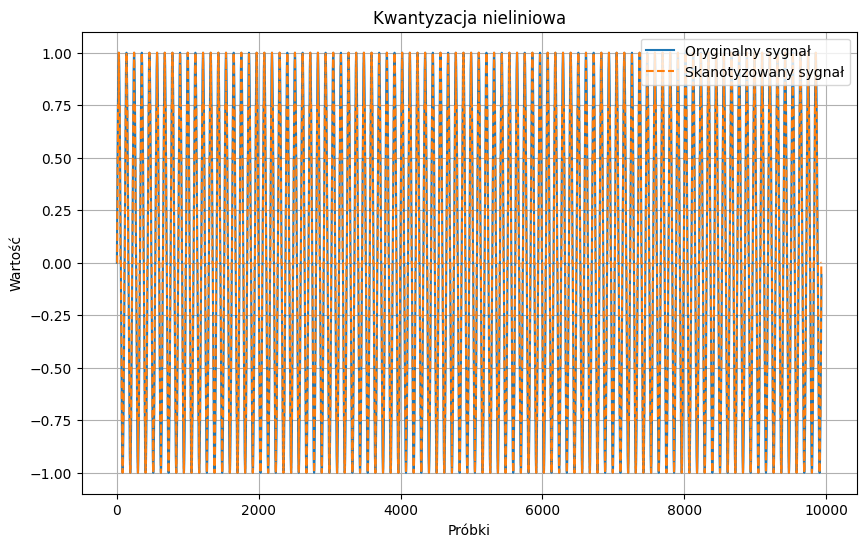

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Krok 1: Przygotowanie sygnału
fs = 1080
t = np.arange(0, 9.2, 1/fs)
f = 10
amplitude = 1
sig = np.sin(2 * np.pi * f * t) * amplitude

# Krok 2: Określenie liczby poziomów kwantyzacji
quantization_levels = 5  # Przykładowa liczba poziomów kwantyzacji

# Krok 3: Określenie zakresu kwantyzacji
quantization_range = 1.0  # Przykładowy zakres wartości od -1 do 1

# Krok 4: Określenie funkcji nieliniowej
def non_linear_quantization_function(x, levels):
    return (x * (levels - 1)).astype(int) / (levels - 1)

# Krok 5: Kwantyzacja nieliniowa
quantized_signal = non_linear_quantization_function(sig, quantization_levels) * quantization_range

# Krok 6: Odtworzenie sygnału zkwantyzowanego
reconstructed_signal = quantized_signal

# Krok 7: Ocena błędu kwantyzacji (opcjonalnie)
mse = np.mean((sig - reconstructed_signal) ** 2)
print("Błąd kwantyzacji (MSE):", mse)

# Krok 8: Wyświetlanie wyników na wykresie
plt.figure(figsize=(10, 6))
plt.plot(sig, label='Oryginalny sygnał')
plt.plot(reconstructed_signal, label='Skanotyzowany sygnał', linestyle='--')
plt.xlabel('Próbki')
plt.ylabel('Wartość')
plt.title('Kwantyzacja nieliniowa')
plt.legend()
plt.grid(True)
plt.show()


#Zadanie 4
Załaduj plik speech1.wav. Następnie odczytaj jego częstotliwość próbkowania, liczbę kanałów, liczbę
próbek, długość sygnału w sekundach, wektor zawierający wartości próbek sygnału oraz maksymalną i
średnią wartość amplitudy. Wyświetl wykres sygnału oraz przybliżony przedział czasu 20000 s - 20700 s

In [49]:
audio_path = '/content/drive/MyDrive/School/AEH/Cyfrowe-przetwarzanie-sygnalow/speech1.wav'
sampling_rate, audio_data = sp.io.wavfile.read(audio_path)

print(f"Częstotliwość próbkowania: {sampling_rate} Hz")
print(f"Liczba kanałów: {len(audio_data.shape)}")
print(f"Liczba próbek: {audio_data.shape[0]}")
length_in_secs = round(audio_data.shape[0] / sampling_rate, 2)
print(f"Długość sygnału w sekundach: {length_in_secs} s")
print(f"Wektor wartości (próbek) sygnału: {audio_data}")
max_amplitude = np.max(audio_data)
avg_amplitude = round(np.mean(audio_data), 2)
print(f"Max. wartość amplitudy: {max_amplitude}")
print(f"Średnia wartość amplitudy: {avg_amplitude}")

Częstotliwość próbkowania: 44100 Hz
Liczba kanałów: 1
Liczba próbek: 63503
Długość sygnału w sekundach: 1.44 s
Wektor wartości (próbek) sygnału: [0 0 0 ... 0 0 0]
Max. wartość amplitudy: 11853
Średnia wartość amplitudy: -2.11


Text(0, 0.5, 'amplituda')

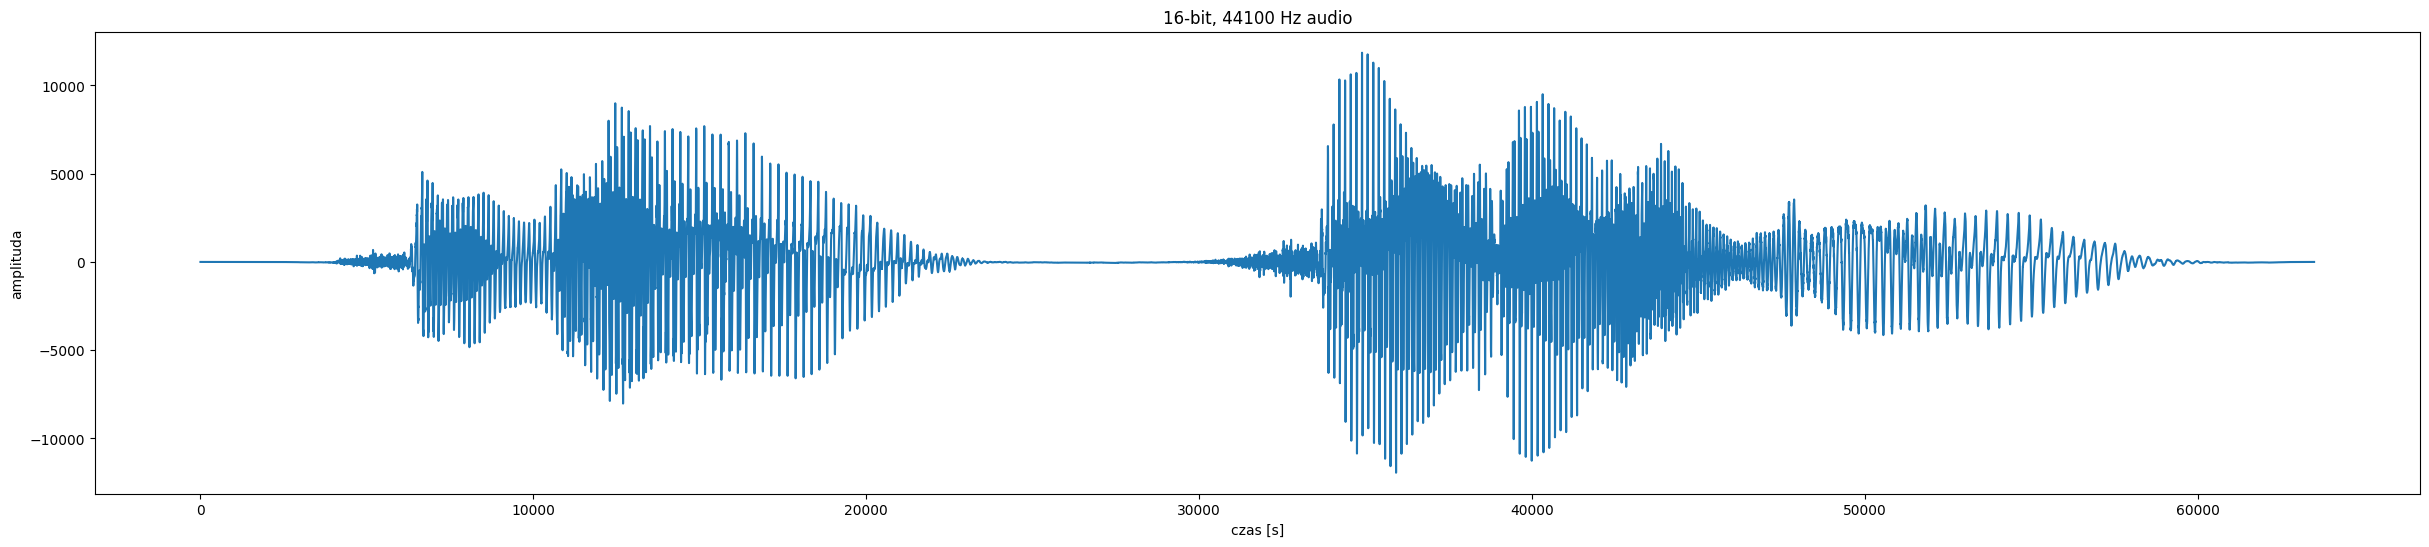

In [50]:
plt.figure(figsize=(30, 6))
plt.plot(audio_data)
plt.title('16-bit, 44100 Hz audio')
plt.xlabel('czas [s]')
plt.ylabel('amplituda')


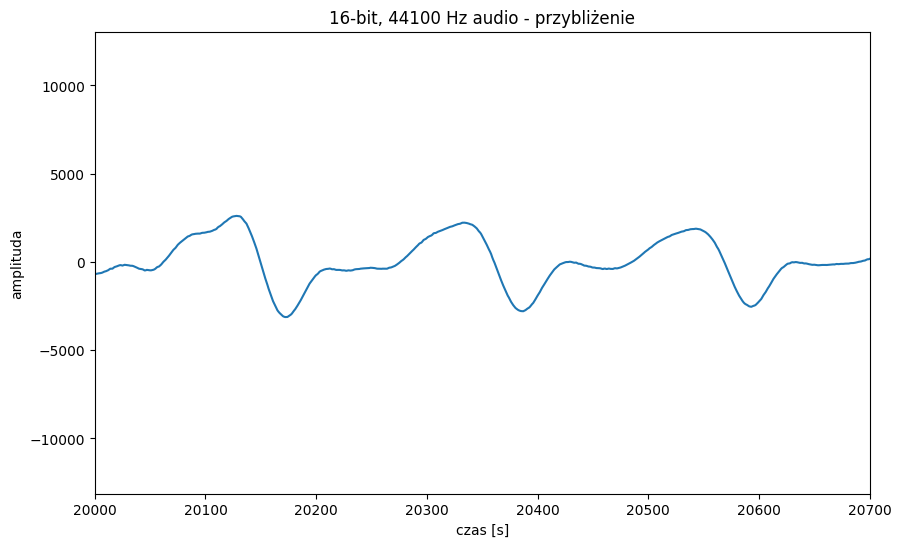

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(audio_data)
plt.xlim([20000, 20700])
plt.title('16-bit, 44100 Hz audio - przybliżenie')
plt.xlabel('czas [s]')
plt.ylabel('amplituda')

plt.show()

In [52]:
Audio(audio_data, rate=44100)

#Rozdzielczość bitowa przy kwantyzacji:
Liczba poziomów kwantyzacji: opisuje, na ile poziomów zostaje podzielony zakres wartości sygnału. Na
przykład, jeśli mówisz, że używasz 8 poziomów kwantyzacji, oznacza to, że zakres wartości sygnału jest
dzielony na 8 równych części. Ta metoda jest bardziej ogólna i używana nie tylko w kontekście sygnałów
cyfrowych, ale także w analizie danych i statystyce.
Rozdzielczość bitowa: W kontekście sygnałów cyfrowych rozdzielczość bitowa opisuje ilość bitów użytych
do reprezentacji każdego poziomu kwantyzacji. Na przykład, 8-bitowa rozdzielczość oznacza, że każdy
poziom kwantyzacji jest reprezentowany za pomocą 8 bitów. Wartość każdego poziomu kwantyzacji jest
zapisywana jako ciąg bitów. Rozdzielczość bitowa jest często używana w kontekście dźwięku i obrazów
cyfrowych.
Obie metody są ze sobą powiązane. Liczba poziomów kwantyzacji można przeliczyć na rozdzielczość
bitową i odwrotnie, ale stosuje się je w różnych kontekstach. Rozdzielczość bitowa jest bardziej związana z
technicznymi aspektami przetwarzania sygnałów cyfrowych, zwłaszcza w dziedzinie dźwięku i obrazu,
gdzie informacja jest zapisywana w postaci bitów.
Zadanie 5
Oblicz liczbę poziomów kwantyzacji, przy rozdzielczościach bitowcyh:
• 8 bit
• 6 bit
• 4 bit
• 3 bit
• 2 bit
Dla przykładu, jeśli mówimy o 16-bitowej rozdzielczości dźwięku, oznacza to, że każdy próbka dźwięku jest
reprezentowana za pomocą 16 bitów, a liczba poziomów kwantyzacji wynosi 2^16, czyli 65536 poziomów

In [53]:
print(f'Liczba poziomów kwantyzacji, przy rozdzielczości bitowej 8 bit: {2**8}')
print(f'Liczba poziomów kwantyzacji, przy rozdzielczości bitowej 6 bit: {2**6}')
print(f'Liczba poziomów kwantyzacji, przy rozdzielczości bitowej 4 bit: {2**4}')
print(f'Liczba poziomów kwantyzacji, przy rozdzielczości bitowej 3 bit: {2**3}')
print(f'Liczba poziomów kwantyzacji, przy rozdzielczości bitowej 2 bit: {2**2}')

Liczba poziomów kwantyzacji, przy rozdzielczości bitowej 8 bit: 256
Liczba poziomów kwantyzacji, przy rozdzielczości bitowej 6 bit: 64
Liczba poziomów kwantyzacji, przy rozdzielczości bitowej 4 bit: 16
Liczba poziomów kwantyzacji, przy rozdzielczości bitowej 3 bit: 8
Liczba poziomów kwantyzacji, przy rozdzielczości bitowej 2 bit: 4


#zadanie 6 Kwantyzacja sygnałów dźwiękowych
Dokonaj kwantyzacji sygnału z Zadania 2, przy rozdzielczości kwantyzacji = 8 bit. Następnie wyświetl
wektor wartości (próbek) sygnału oraz maksymalną i średnią wartość aplitudy. Wyświetl wykresy sygnału
oraz przybliżony przesział czasu 20000 s - 20700 s

In [55]:
audio_data_float = audio_data / 2**16
quantization_bits = 8  # Rozdzielczość kwantyzacji
audio_data_8bit = (audio_data_float * 2**quantization_bits).astype(int)  # Sygnał skwantyzowany
print(audio_data_8bit)
print(f"Wektor wartości (próbek) sygnału: {audio_data_8bit}")
max_amplitude = np.max(audio_data_8bit)
avg_amplitude = round(np.mean(audio_data_8bit), 2)
print(f"Max. wartość amplitudy: {max_amplitude}")
print(f"Średnia wartość amplitudy: {avg_amplitude}")


[0 0 0 ... 0 0 0]
Wektor wartości (próbek) sygnału: [0 0 0 ... 0 0 0]
Max. wartość amplitudy: 46
Średnia wartość amplitudy: -0.02


Text(0, 0.5, 'amplituda')

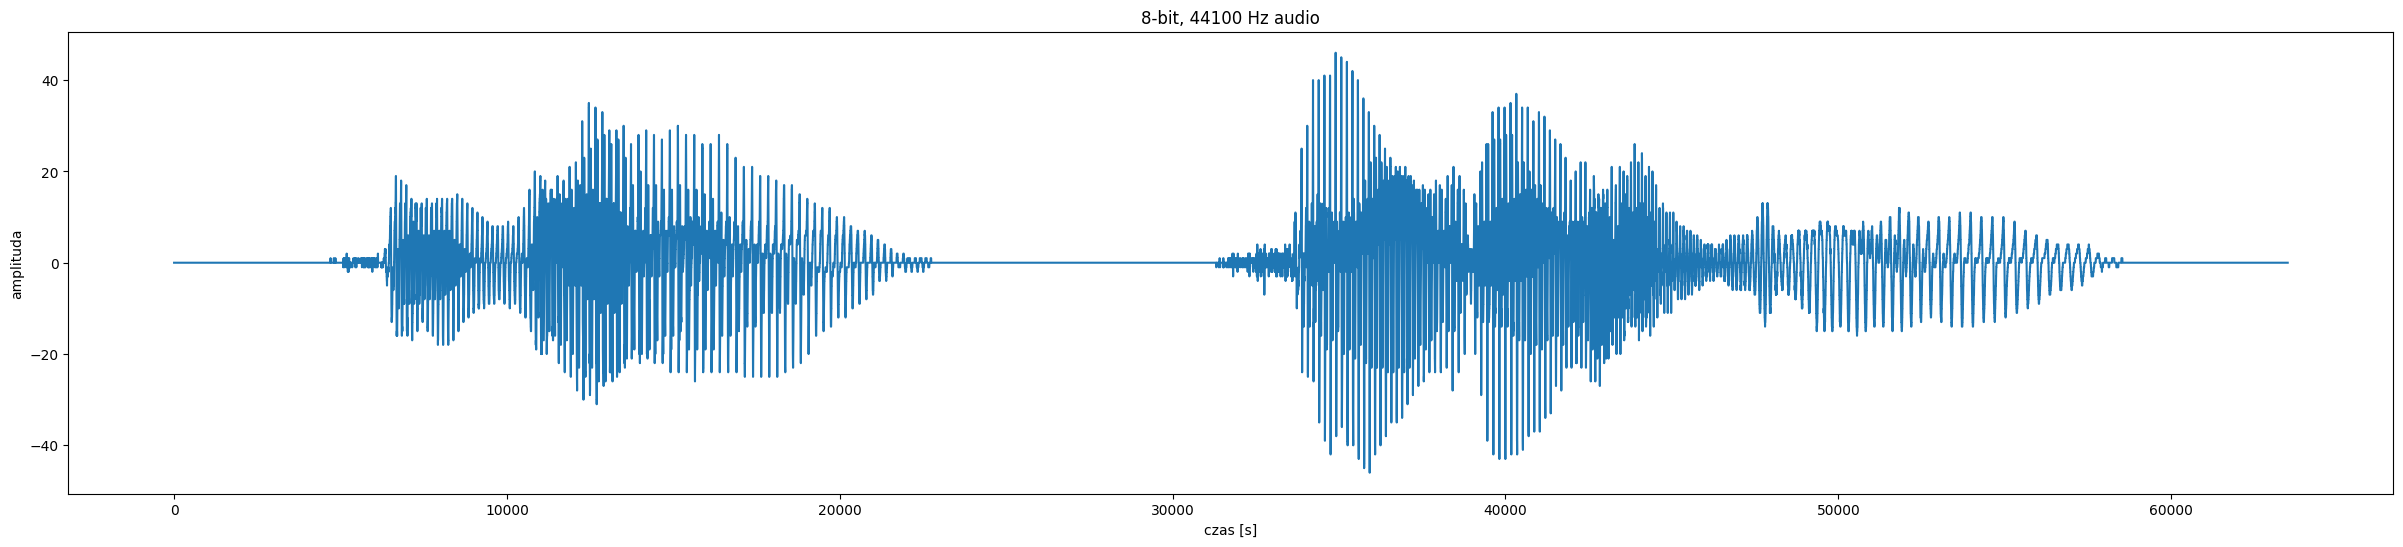

In [56]:
plt.figure(figsize=(30, 6))
plt.plot(audio_data_8bit)  # Tworzenie wykresu skwantyzowanego sygnału
plt.title('8-bit, 44100 Hz audio')
plt.xlabel('czas [s]')
plt.ylabel('amplituda')


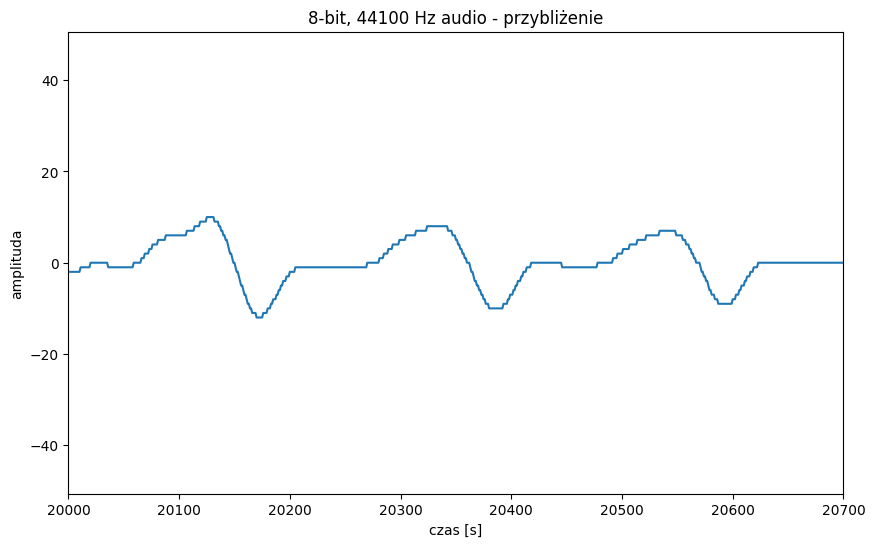

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(audio_data_8bit)  # Tworzenie wykresu skwantyzowanego sygnału
plt.xlim([20000, 20700])
plt.title('8-bit, 44100 Hz audio - przybliżenie')
plt.xlabel('czas [s]')
plt.ylabel('amplituda')
plt.show()

In [58]:
Audio(audio_data_8bit, rate=sampling_rate)

#Zadanie 7
Dokonaj kwantyzacji sygnału z Zadania 3, dla różnych rozdzielczości kwantyzacji:
• 6 bit
• 4 bit
• 3 bit
• 2 bit
Następnie wyświetl wektor wartości (próbek) sygnału oraz maksymalną i średnią wartość aplitudy.
Wyświetl wykresy sygnału oraz przybliżony przesział czasu 20000 s - 20700 s. Do kwantyzacji i
wyświetlania wykresów możesz zdefiniować funkcje, a następnie wywołać je z odpowiednimi wartościami
argumentów. Co możesz zaobserwować

In [59]:
def quantization_function(quantization_bits, audio_data):
    audio_data_float = audio_data / 2**16
    quantized_signal = (audio_data_float * 2**quantization_bits).astype(int)
    max_amplitude = np.max(quantized_signal)
    avg_amplitude = round(np.mean(quantized_signal), 2)
    print(quantized_signal)
    print(f"Wektor wartości (próbek) sygnału: {quantized_signal}")
    print(f"Max. wartość amplitudy: {max_amplitude}")
    print(f"Średnia wartość amplitudy: {avg_amplitude}")
    return quantized_signal

In [60]:
def display_quantized_signal(quantized_signal, quantization_bits):
    plt.figure(figsize=(10, 6))
    plt.plot(quantized_signal)  # Tworzenie wykresu skwantyzowanego sygnału
    plt.title(f'{quantization_bits}-bit, 44100 Hz audio')
    plt.xlabel('czas [s]')
    plt.ylabel('amplituda')

In [61]:
def zoom_signal(quantized_signal, quantization_bits):
    plt.figure(figsize=(10, 6))
    plt.plot(quantized_signal)  # Tworzenie wykresu skwantyzowanego sygnału
    plt.xlim([20000, 20700])
    plt.title(f'{quantization_bits}-bit, 44100 Hz audio zoomed')
    plt.xlabel('czas [s]')
    plt.ylabel('amplituda')
    plt.show()

# Rozdzielczość kwantyzacji 6 bitów

[0 0 0 ... 0 0 0]
Wektor wartości (próbek) sygnału: [0 0 0 ... 0 0 0]
Max. wartość amplitudy: 11
Średnia wartość amplitudy: -0.02


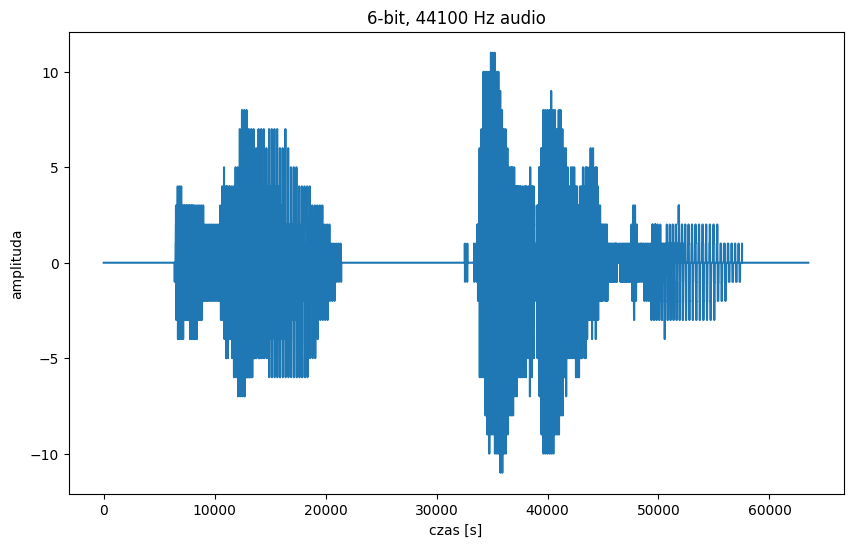

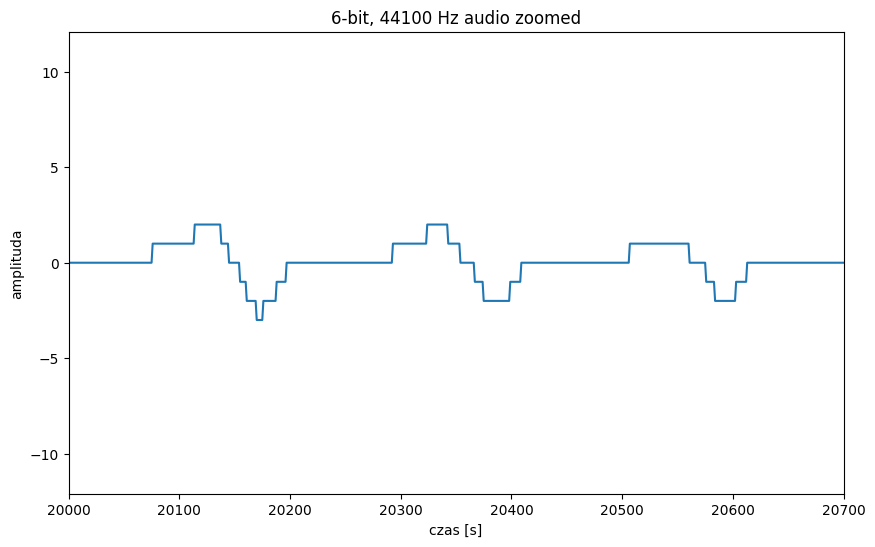

In [62]:
audio_path = '/content/drive/MyDrive/School/AEH/Cyfrowe-przetwarzanie-sygnalow/speech1.wav'
sampling_rate, audio_data = sp.io.wavfile.read(audio_path)

quantization_bits_6 = 6

quantized_signal = quantization_function(quantization_bits_6, audio_data)
display_quantized_signal(quantized_signal, quantization_bits_6)
zoom_signal(quantized_signal, quantization_bits_6)

In [63]:
Audio(quantized_signal, rate=sampling_rate)

# Rozdzielczość kwantyzacji 4 bitów

[0 0 0 ... 0 0 0]
Wektor wartości (próbek) sygnału: [0 0 0 ... 0 0 0]
Max. wartość amplitudy: 2
Średnia wartość amplitudy: -0.01


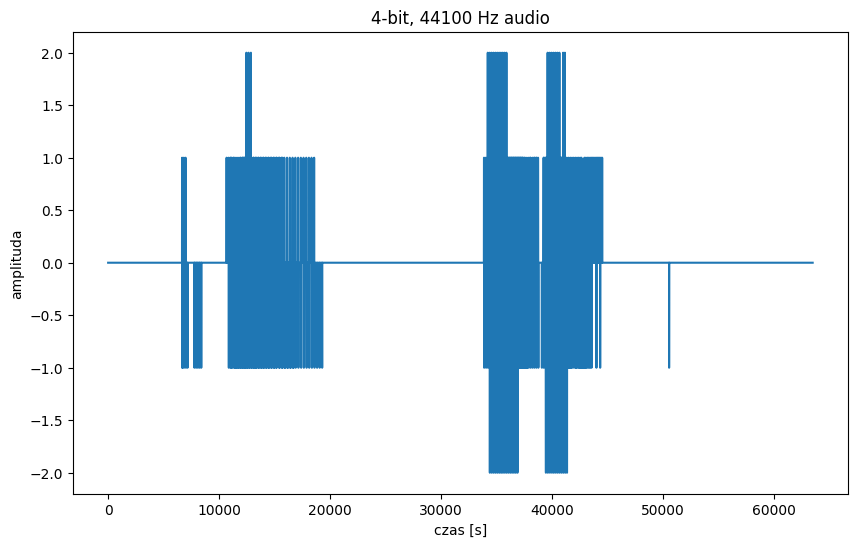

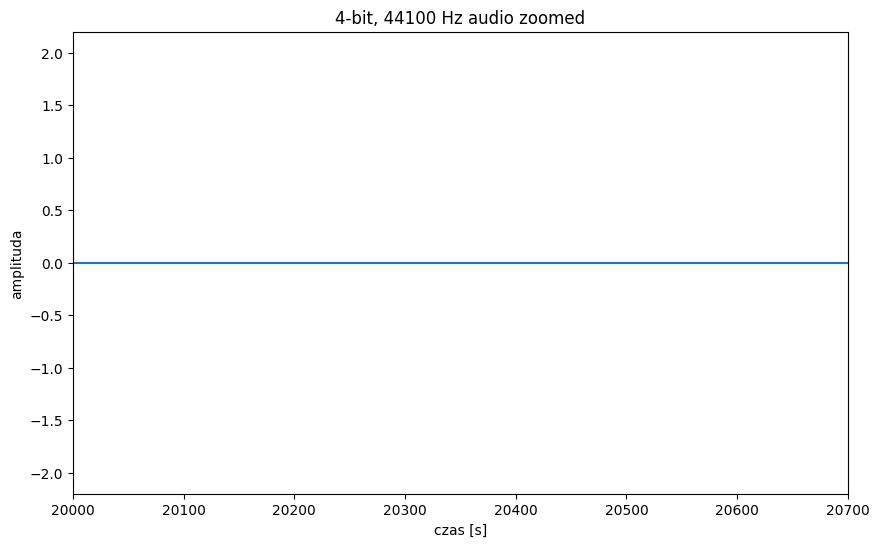

In [64]:
quantization_bits_4 = 4
sampling_rate, audio_data = sp.io.wavfile.read(audio_path)
quantized_signal = quantization_function(quantization_bits_4, audio_data)
display_quantized_signal(quantized_signal, quantization_bits_4)
zoom_signal(quantized_signal, quantization_bits_4)


In [65]:
Audio(quantized_signal, rate=sampling_rate)

# Rozdzielczość kwantyzacji 3 bitów

[0 0 0 ... 0 0 0]
Wektor wartości (próbek) sygnału: [0 0 0 ... 0 0 0]
Max. wartość amplitudy: 1
Średnia wartość amplitudy: -0.0


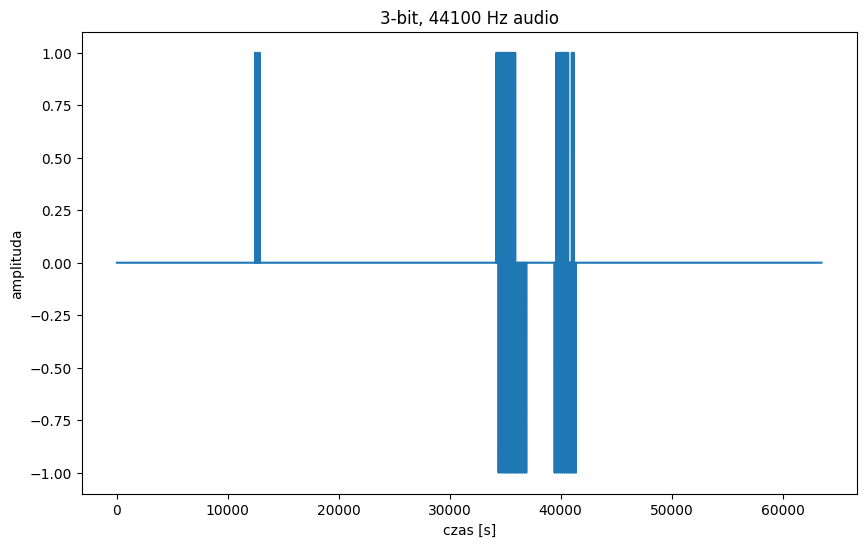

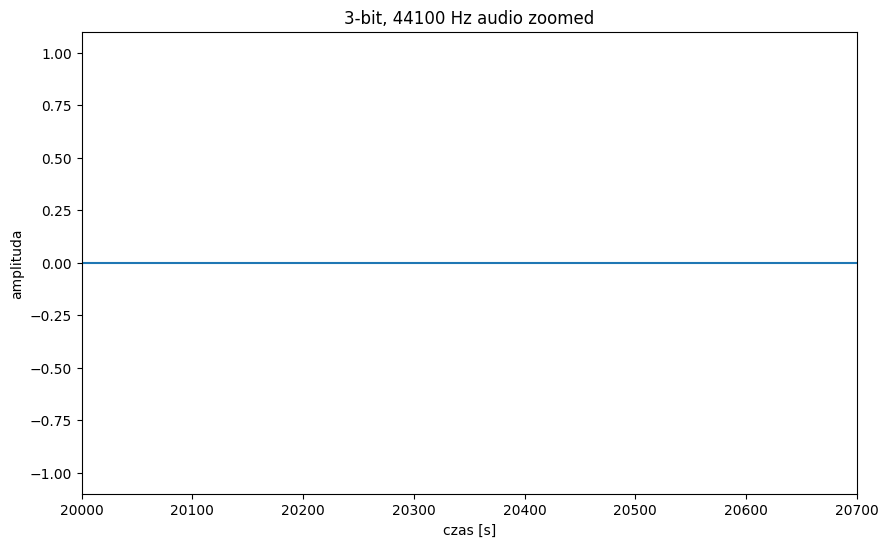

In [66]:
quantization_bits_3 = 3
sampling_rate, audio_data = sp.io.wavfile.read(audio_path)
quantized_signal = quantization_function(quantization_bits_3, audio_data)
display_quantized_signal(quantized_signal, quantization_bits_3)
zoom_signal(quantized_signal, quantization_bits_3)


In [67]:
Audio(quantized_signal, rate=sampling_rate)

# Rozdzielczość kwantyzacji 2 bitów

[0 0 0 ... 0 0 0]
Wektor wartości (próbek) sygnału: [0 0 0 ... 0 0 0]
Max. wartość amplitudy: 0
Średnia wartość amplitudy: 0.0


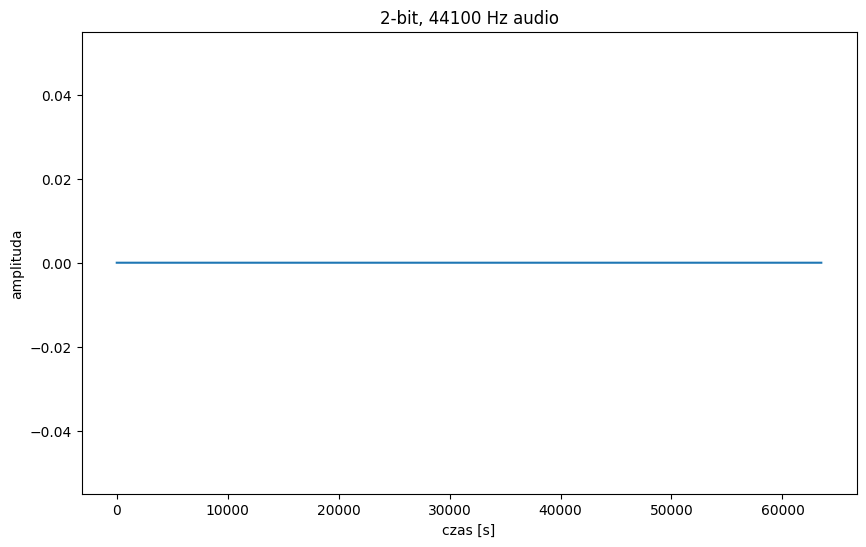

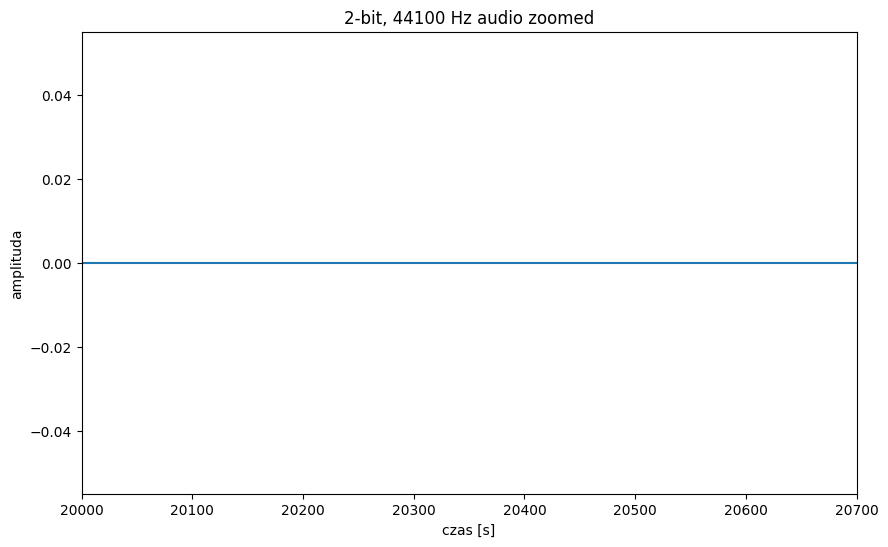

In [68]:
quantization_bits_2 = 2
sampling_rate, audio_data = sp.io.wavfile.read(audio_path)
quantized_signal = quantization_function(quantization_bits_2, audio_data)
display_quantized_signal(quantized_signal, quantization_bits_2)
zoom_signal(quantized_signal, quantization_bits_2)


In [69]:
Audio(quantized_signal, rate=sampling_rate)

/usr/local/lib/python3.10/dist-packages/IPython/lib/display.py:174: RuntimeWarning: invalid value encountered in divide
  scaled = data / normalization_factor * 32767
